# Исследование приложения Procrastinate Pro+

#### Описание проекта

Мы исследуем развлекательное приложение Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Нам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

#### Описание данных

В нашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenu` — сумма заказа.

Структура `costs_info_short.csv`:
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

#### Задачи для исследовательского анализа данных

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулировать выводы.

#### Задачи для маркетингового анализа

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализировать динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайть, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Использовать профили пользователей.

Написать промежуточные выводы.

#### Задачи по оценке окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определим самостоятельно.

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Написать вывод, описать возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

## Загрузка и подготовка данных к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучим данные и выполним предобработку, выясним, есть ли в данных пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

### Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta

In [2]:
# при загрузке датафреймов применим параметр parse_dates,
# в который передадим названия столбцов с датами,
# чтобы они загрузились в правильном формате
try:
    visits = pd.read_csv('datasets/visits_info_short.csv', 
                         parse_dates=['Session Start', 'Session End'])
    orders = pd.read_csv('datasets/orders_info_short.csv', 
                         parse_dates=['Event Dt'])
    costs = pd.read_csv('datasets/costs_info_short.csv', 
                        parse_dates=['dt'])
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv', 
                         parse_dates=['Session Start', 'Session End'])
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv', 
                         parse_dates=['Event Dt'])
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv', 
                        parse_dates=['dt'])

In [3]:
def main_info(df):
    """
    Принимает датафрейм и выводит
    первые 5 строк, основную информацию,
    количество пропусков и дубликатов
    в этом датафрейме
    """
    print('Первые 5 строчек')
    display(df.head())
    print()
    print('Основная информация')
    display(df.info())
    print()
    print('Количество пропусков')
    display(df.isna().sum())
    print()
    print('Количество дубликатов')
    display(df.duplicated().sum())

In [4]:
main_info(visits)

Первые 5 строчек


User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          Session End  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40


Основная информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None


Количество пропусков


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


Количество дубликатов


0

In [5]:
main_info(orders)

Первые 5 строчек


User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99


Основная информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None


Количество пропусков


User Id     0
Event Dt    0
Revenue     0
dtype: int64


Количество дубликатов


0

In [6]:
main_info(costs)

Первые 5 строчек


dt   Channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1


Основная информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None


Количество пропусков


dt         0
Channel    0
costs      0
dtype: int64


Количество дубликатов


0

**Вывод**:\
`visits`
* данные о 309901 сессии, 6 параметров
* пропусков нет
* явных дубликатов нет
* типы данных соответствуют значениям
* названия столбцов нужно привести к snake_case

`orders`
* данные о 40212 заказах, 3 параметра
* пропусков нет
* явных дубликатов нет
* типы данных соответствуют значениям
* названия столбцов нужно привести к snake_case

`costs`
* данные о 1800 рекламных кампаниях, 3 параметра
* пропусков нет
* явных дубликатов нет
* типы данных соответствуют значениям
* названия столбцов нужно привести к snake_case

### Предобработка данных

**Попробуем найти неявные дубликаты**\
Для этого рассмотрим уникальные значения некоторых столбцов наших датафреймов

In [7]:
visits['Region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [8]:
visits['Device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [9]:
visits['Channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [10]:
costs['Channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявные дубликаты не обнаружены

**Приведем названия столбцов к snake_case**

In [11]:
visits = visits.rename(columns={
    'User Id':'user_id',
    'Region':'region',
    'Device':'device',
    'Channel':'channel',
    'Session Start':'session_start',
    'Session End':'session_end'
})

In [12]:
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

In [13]:
orders = orders.rename(columns={
    'User Id':'user_id',
    'Event Dt':'event_dt',
    'Revenue':'revenue'
})

In [14]:
orders.head()

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

In [15]:
costs = costs.rename(columns=str.lower)

In [16]:
costs.head()

dt   channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1

**Проверим, что данные о привлечённых пользователях действительно даны за период с 1 мая по 27 октября 2019 года**

Верхнюю границу проверим только у датафрейма с рекламными компаниями, так как привлеченные пользователи могут посещать сайт и после даты привлечения

In [17]:
visits[['session_start', 'session_end']].min()

session_start   2019-05-01 00:00:41
session_end     2019-05-01 00:07:06
dtype: datetime64[ns]

In [18]:
orders['event_dt'].min()

Timestamp('2019-05-01 00:28:11')

In [19]:
display(costs['dt'].min())
costs['dt'].max()

Timestamp('2019-05-01 00:00:00')

Timestamp('2019-10-27 00:00:00')

Даты совпадают

### Вывод

В загруженных датафреймах `visits` (309901 строка, 6 столбцов), `orders` (40212 строк, 3 столбца) и `costs` (1800 строк, 3 столбца) не было обнаружено пропусков, дубликатов (явных и неявных), несоответствий типов данных (так как мы заранее использовали параметр `parse_dates` при чтении файлов), даты в таблицах соответствуют заявленным в описании исследования, но названия столбцов требовалось привести к единому стилю snake case.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания пользовательских профилей

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt']) #без этого всё ломается
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчёта удержания

In [21]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [22]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI

In [23]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

In [25]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулировать выводы.

### Составление профилей пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей

Составим профили, используя функцию `get_profiles()`

In [28]:
profiles = get_profiles(visits, orders, costs)

Проверим, что всё работает

In [29]:
main_info(profiles)

Первые 5 строчек


user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769


Основная информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[s] 
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), datetime64[s](1), float64(1), int64(1), object(3)
memory usage: 9.3+ MB


None


Количество пропусков


user_id             0
first_ts            0
channel             0
device              0
region              0
dt                  0
month               0
payer               0
acquisition_cost    0
dtype: int64


Количество дубликатов


0

Определим минимальную дату привлечения

In [30]:
profiles['dt'].min()

Timestamp('2019-05-01 00:00:00')

Минимальная дата - 1 мая 2019 года

Определим максимальную дату

In [31]:
profiles['dt'].max()

Timestamp('2019-10-27 00:00:00')

Максимальная дата - 21 октября 2019 года

Даты совпадают с указанными в ТЗ

#### Вывод

Используя написанную ранее функцию `get_profiles()` мы получили датафрейм с профилями пользователей. Мы выделили дату (`dt`) и месяц (`month`) привлечения каждого пользователя, является ли этот пользователь платящим (`payer`), а также среднюю стоимость привлечения пользователя из определенного источника в определенный день (`acquisition_cost`).\
Минимальная дата привлечения пользователя: 1 мая 2019 года\
Максимальная дата привлечения пользователя: 27 октября 2019 года\
Даты совпадают с указанными в ТЗ.

### Страны

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Посмотрим, сколько уникальных пользователей было привлечено в разбивке по странам 

In [32]:
users_country = (
    profiles.groupby('region')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id': 'unique_users'})
    .sort_values(by='unique_users', ascending=False)
)
users_country['percent'] = users_country['unique_users'].div(users_country['unique_users'].sum())*100
users_country

unique_users    percent
region                                
United States        100002  66.664445
UK                    17575  11.716042
France                17450  11.632713
Germany               14981   9.986801

Визуализируем процентное соотношение

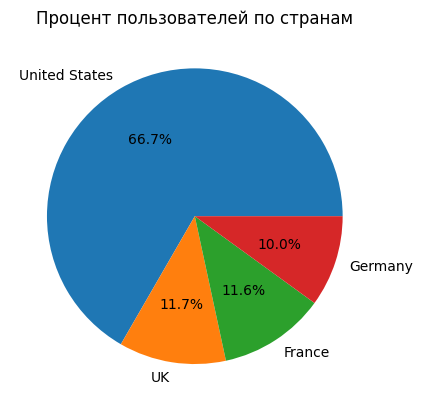

In [33]:
(
    users_country['percent']
    .plot
    .pie(autopct='%1.1f%%')
)
plt.title('Процент пользователей по странам')
plt.xlabel('')
plt.ylabel('');

Посмотрим, сколько процентов от всех пользователей являются платящими

In [34]:
round(profiles['payer'].mean()*100, 2)

5.92

Разобьем пользователей на платящий и неплатящих

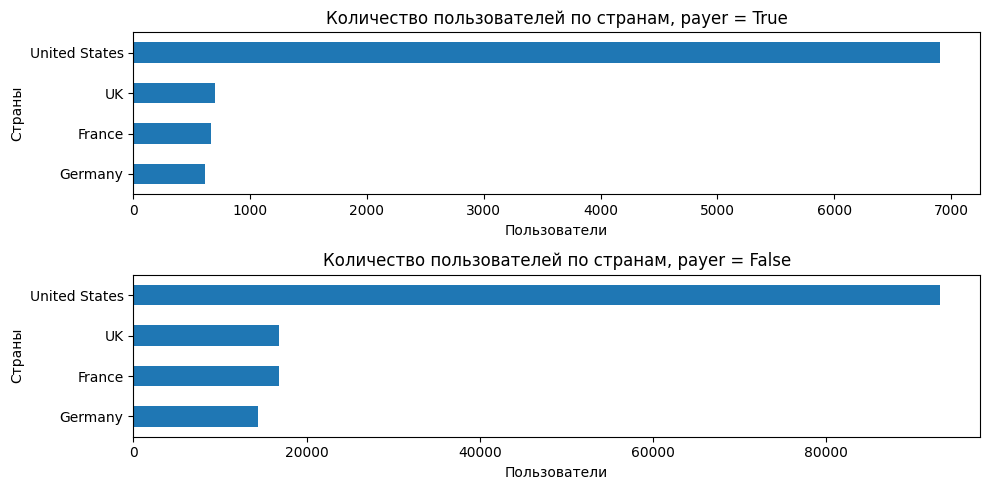

In [35]:
plt.figure(figsize=(10, 5))

for i, payer in enumerate(profiles['payer'].unique()):
    (
    profiles[profiles['payer'] == payer].groupby('region')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id')
    .plot
    .barh(legend=False, ax=plt.subplot(2, 1, i + 1))
    )
    plt.title(f'Количество пользователей по странам, payer = {payer}')
    plt.xlabel('Пользователи')
    plt.ylabel('Страны')
    plt.tight_layout();

Рассчитаем общее количество пользователей по странам

In [36]:
total_country = (
    profiles.groupby('region')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id': 'unique_users'})
    .sort_values(by='unique_users', ascending=False)
)
total_country

unique_users
region                     
United States        100002
UK                    17575
France                17450
Germany               14981

Рассчитаем количество платящих пользователей

In [37]:
payers_country = (
    profiles[profiles['payer'] == True]
    .groupby('region')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id': 'unique_payers'})
    .sort_values(by='unique_payers', ascending=False)
    .reset_index()
)
payers_country

region  unique_payers
0  United States           6902
1             UK            700
2         France            663
3        Germany            616

Объединим таблицы, чтобы рассчитать процент платящих от всех пользователей по странам

In [38]:
result_country = total_country.merge(payers_country, on='region', how='left')

In [39]:
result_country

region  unique_users  unique_payers
0  United States        100002           6902
1             UK         17575            700
2         France         17450            663
3        Germany         14981            616

In [40]:
result_country['payers_percent'] = result_country['unique_payers'] / result_country['unique_users'] * 100

Убираем колонку с количеством платящих, оставляя общее количество пользователей и долю платящих от них

In [41]:
result_country = result_country.drop(columns=['unique_payers'])

In [42]:
result_country.sort_values(by='payers_percent', ascending=False)

region  unique_users  payers_percent
0  United States        100002        6.901862
3        Germany         14981        4.111875
1             UK         17575        3.982930
2         France         17450        3.799427

#### Вывод

Мы имеем пользователей из США (United Stated), Великобритании (UK), Франции (France) и Германии (Germany).

США 100002 пользователя (66.7%)\
Великобритания 17575 пользователей (11.7%)\
Франция 17450 пользователей (11.6%)\
Германия 14981 пользователей (10%)

Доля платящих пользователей от числа пользователей из этой страны:

США 6.9%\
Германия 4.1%\
Великобритания 4%\
Франция 3.7%

Таким образом, подавляющее большинство пользователей из США (66.7%) с Великобританией на 2 месте (11.7%).\
США также находятся на первом месте по доле платящих (6.9%), но по этому параметру отличаются не настолько сильно от соседней Германии (4.1%).\
Средний процент платящих среди всех пользователей 5.92%

### Устройства

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

Рассмотрим устройства и общее количество пользователей

Количество пользователей по устройствами и их доли

In [43]:
users_device = (
    profiles
    .groupby('device')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id': 'unique_users'})
    .sort_values(by='unique_users', ascending=False)
    .reset_index()
)
users_device['total_percent'] = round(users_device['unique_users'] / users_device['unique_users'].sum() * 100, 2)
users_device

device  unique_users  total_percent
0   iPhone         54479          36.32
1  Android         35032          23.35
2       PC         30455          20.30
3      Mac         30042          20.03

Рассмотрим количество и долю платящих пользователей по устройствам

In [44]:
payers_device = (
    profiles[profiles['payer'] == True]
    .groupby('device')
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id': 'unique_payers'})
    .sort_values(by='unique_payers', ascending=False)
    .reset_index()
)
payers_device['payers_percent'] = round(payers_device['unique_payers'] / payers_device['unique_payers'].sum() * 100, 2)
payers_device

device  unique_payers  payers_percent
0   iPhone           3382           38.08
1  Android           2050           23.08
2      Mac           1912           21.53
3       PC           1537           17.31

Соединим таблицы, чтобы рассчитать долю платящих пользователей от всех (`payers_percent`)

In [45]:
result_device = users_device.merge(payers_device[['device', 'unique_payers']], on='device', how='left')

In [46]:
result_device['payers_percent'] = result_device['unique_payers'] / result_device['unique_users'] * 100

In [47]:
result_device = result_device.drop(columns=['unique_payers'])

In [48]:
result_device.sort_values(by='payers_percent', ascending=False)

device  unique_users  total_percent  payers_percent
3      Mac         30042          20.03        6.364423
0   iPhone         54479          36.32        6.207897
1  Android         35032          23.35        5.851793
2       PC         30455          20.30        5.046790

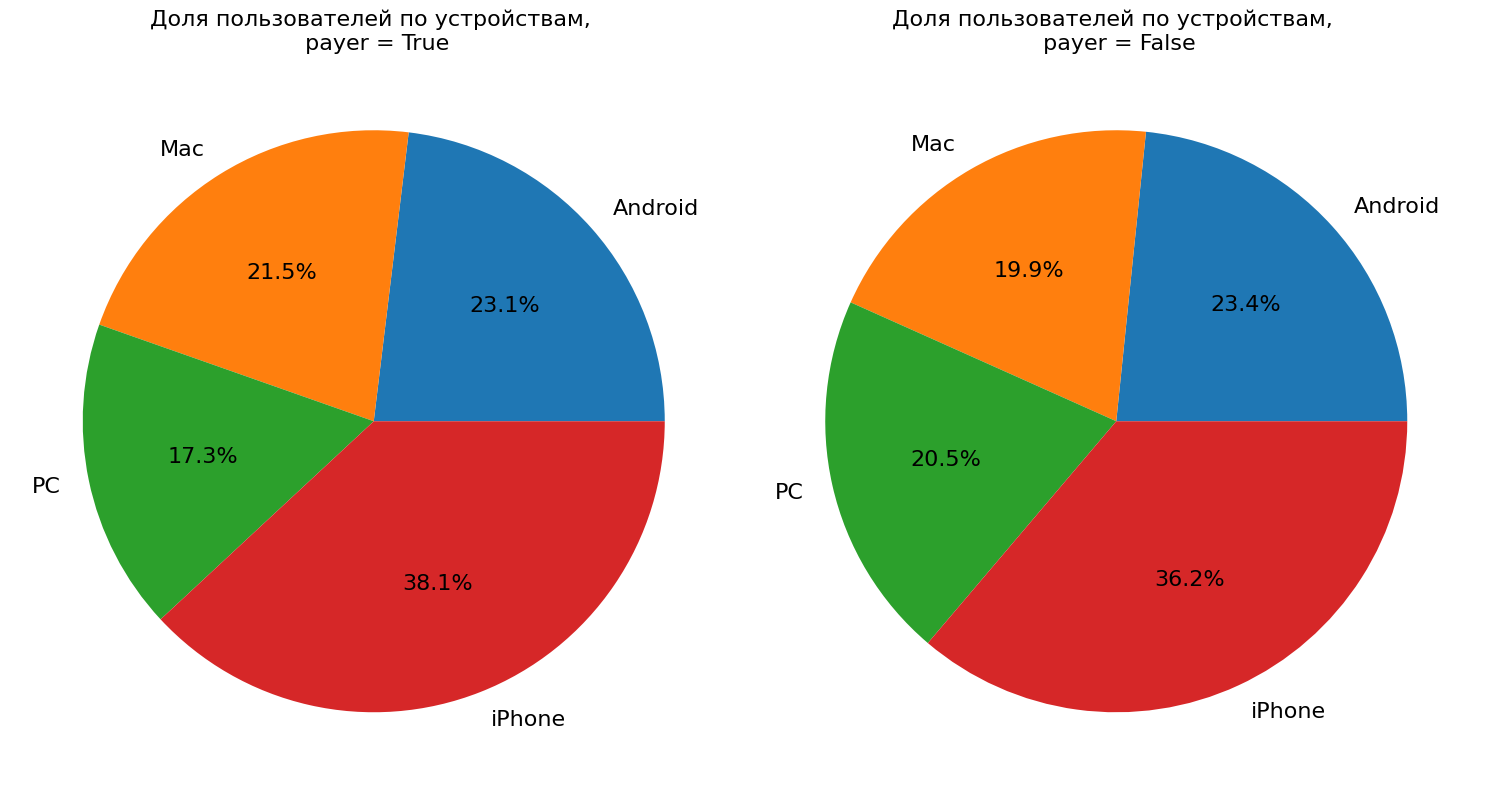

In [49]:
plt.figure(figsize=(15, 15))

for i, payer in enumerate(profiles['payer'].unique()):
    (
    profiles[profiles['payer'] == payer].groupby('device')
    .agg({'user_id':'nunique'})
    .sort_values(by='device') #алфавитная сортировка чтобы цвета на обоих графиках были одинаковые
    .plot
    .pie(y='user_id', legend=False, fontsize=16, ax=plt.subplot(1, 2, i + 1), autopct='%1.1f%%')
    )
    plt.title(f'Доля пользователей по устройствам, \n payer = {payer}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout();

#### Вывод

Приложением пользуются на 4 платформах: iPhone (36%), Android (23%), PC (20%) и Mac (20%).\
Среди платящих пользователей доли распределены несколько иначе:

iPhone (38%)\
Android (23%)\
Mac	(22%)\
PC (17%)

Мы видим, что iPhone все ещё является наиболее популярным устройством, как среди платящих, так и неплатящих пользователей. Но у платящих пользователей видно увеличение доли у iPhone (на 2 п.п.) и Mac (на 1.5 п.п.), устройств, считающихся более дорогими в сравнении с Android и PC.

Доля платящих пользователей по устройствам:

Mac 6.4%\
iPhone 6.2%\
Android 5.9%\
PC 5%

Видим, что платящих пользователей Mac на 1.4 п.п. больше чем PC, а iPhone на 0.3 п.п. больше чем Android

### Каналы привлечения

Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Рассмотрим каналы привлечения всех пользователей

In [50]:
users_channel = (
    profiles
    .groupby('channel')
    .agg({'user_id':'count'})
    .rename(columns={'user_id': 'unique_users'})
    .sort_values(by='unique_users', ascending=False)
    .reset_index()
)
users_channel['total_percent'] = users_channel['unique_users'] / users_channel['unique_users'].sum() * 100
print('Количество и доли всех пользователей по каналам')
users_channel

Количество и доли всех пользователей по каналам


channel  unique_users  total_percent
0              organic         56439      37.623993
1             FaceBoom         29144      19.428297
2               TipTop         19561      13.039971
3   OppleCreativeMedia          8605       5.736361
4              LeapBob          8553       5.701696
5       WahooNetBanner          8553       5.701696
6       RocketSuperAds          4448       2.965175
7         MediaTornado          4364       2.909178
8              YRabbit          4312       2.874513
9           AdNonSense          3880       2.586529
10      lambdaMediaAds          2149       1.432590

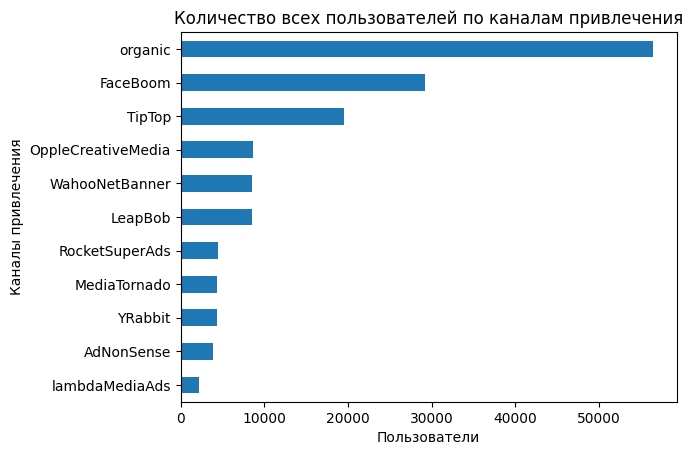

In [51]:
(
    profiles
    .groupby('channel')
    .agg({'user_id':'count'})
    .rename(columns={'user_id': 'unique_users'})
    .sort_values(by='unique_users')
    .plot
    .barh(legend=False)
)
plt.title('Количество всех пользователей по каналам привлечения')
plt.xlabel('Пользователи')
plt.ylabel('Каналы привлечения');

Видим, что органические пользователи обгоняют другие источники привлечения

Рассмотрим платящих пользователей

In [52]:
payers_channel = (
    profiles
    [profiles['payer'] == True]
    .groupby('channel')
    .agg({'user_id':'count'})
    .rename(columns={'user_id': 'unique_payers'})
    .sort_values(by='unique_payers', ascending=False)
    .reset_index()
)
payers_channel['payers_percent'] = payers_channel['unique_payers'] / payers_channel['unique_payers'].sum() * 100
payers_channel

channel  unique_payers  payers_percent
0             FaceBoom           3557       40.051796
1               TipTop           1878       21.146267
2              organic           1160       13.061592
3       WahooNetBanner            453        5.100777
4           AdNonSense            440        4.954397
5       RocketSuperAds            352        3.963518
6              LeapBob            262        2.950118
7   OppleCreativeMedia            233        2.623578
8       lambdaMediaAds            225        2.533498
9              YRabbit            165        1.857899
10        MediaTornado            156        1.756559

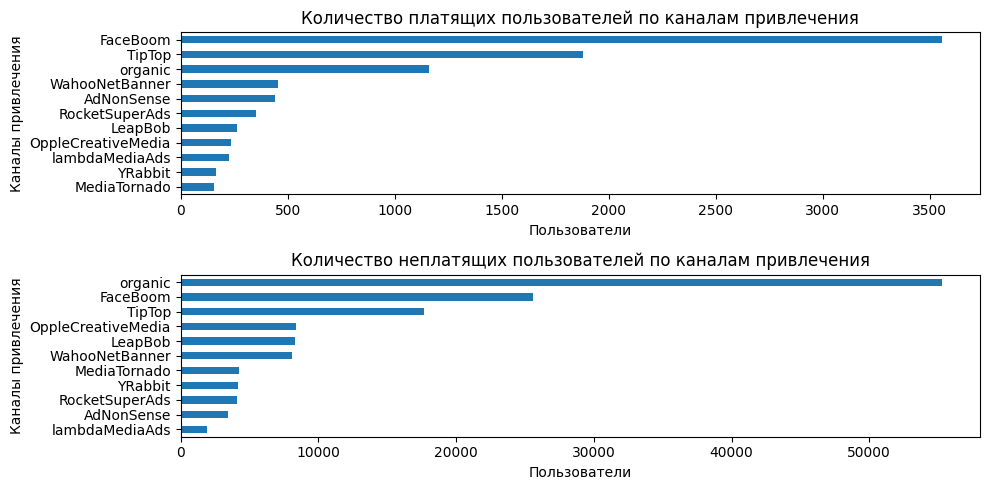

In [53]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(2, 1, 1)
(
    profiles
    [profiles['payer'] == True]
    .groupby('channel')
    .agg({'user_id':'count'})
    .rename(columns={'user_id': 'payers'})
    .sort_values(by='payers')
    .plot
    .barh(legend=False, ax=ax1)
)
plt.title('Количество платящих пользователей по каналам привлечения')
plt.xlabel('Пользователи')
plt.ylabel('Каналы привлечения')

ax2 = plt.subplot(2, 1, 2)
(
    profiles
    [profiles['payer'] == False]
    .groupby('channel')
    .agg({'user_id':'count'})
    .rename(columns={'user_id': 'payers'})
    .sort_values(by='payers')
    .plot
    .barh(legend=False, ax=ax2)
)
plt.title('Количество неплатящих пользователей по каналам привлечения')
plt.xlabel('Пользователи')
plt.ylabel('Каналы привлечения')

plt.tight_layout();

Соединим таблицы, чтобы рассчитать долю платящих пользователей от всех (`payers_percent`)

In [54]:
result_channel = users_channel.merge(payers_channel[['channel', 'unique_payers']], on='channel', how='left')

In [55]:
result_channel['payers_percent'] = result_channel['unique_payers'] / result_channel['unique_users'] * 100

In [56]:
result_channel = result_channel.drop(columns=['unique_payers'])

In [57]:
result_channel.sort_values(by='payers_percent', ascending=False)

channel  unique_users  total_percent  payers_percent
1             FaceBoom         29144      19.428297       12.204914
9           AdNonSense          3880       2.586529       11.340206
10      lambdaMediaAds          2149       1.432590       10.469986
2               TipTop         19561      13.039971        9.600736
6       RocketSuperAds          4448       2.965175        7.913669
5       WahooNetBanner          8553       5.701696        5.296387
8              YRabbit          4312       2.874513        3.826531
7         MediaTornado          4364       2.909178        3.574702
4              LeapBob          8553       5.701696        3.063253
3   OppleCreativeMedia          8605       5.736361        2.707728
0              organic         56439      37.623993        2.055316

#### Вывод

При изучении источников привлечения мы видим, что самый массовый из них - органический (38%). Что хорошо - за привлечение этих пользователей компания ничего не заплатила. В целом топ-5 выглядит так:

organic	38%\
FaceBoom 19%\
TipTop 13%\
OppleCreativeMedia 6%\
LeapBob 6%

Но при изучении платящих пользователей видно, что органические пользователи сместились на 3 место (13%), а самым крупным источником оказался FaceBoom (40%). Топ-5 платящих по количеству:

FaceBoom 40%\
TipTop 21%\
organic 13%\
WahooNetBanner 5%\
AdNonSense 5%

При рассмотрении доли платящих от всех пользователей по каналам видно, что самые платящие пользователи также приходят из FaceBoom (12%). Топ-5 плятящих по доле:

FaceBoom 12.2%\
AdNonSense 11.3%\
lambdaMediaAds 10.4%\
TipTop 9.6%\
RocketSuperAds 7.9%

### Вывод

Мы составили профили пользователей и убедились, что минимальная и максимальная даты привлечения совпадают с указанными ранее:\
**с 1 мая 2019 по 27 октября 2019**.

Наши пользователи живут в США, Великобритании, Франции и Германии.
Разделение всех пользователей по странам:

США 66.7%\
Великобритания 11.7%\
Франция 11.6%\
Германия 10%

Доля платящих пользователей от числа пользователей из этой страны:

США 6.9%\
Германия 4.1%\
Великобритания 4%\
Франция 3.7%

**Самая многочисленная и самая платящая страна - США**

Они пользуются 4 видами устройств: iPhone, Android, Mac, PC.\
Разделение всех пользователей по устройствам:

iPhone 36%\
Android 23%\
PC 20%\
Mac 20%

Доля платящих пользователей по устройствам:

Mac 6.4%\
iPhone 6.2%\
Android 5.9%\
PC 5%

**Наиболее популярное устройство - iPhone, наиболее платящие пользователи - Mac**

Разделение всех пользователей по каналам привлечения (топ-5):

organic	38%\
FaceBoom 19%\
TipTop 13%\
OppleCreativeMedia 6%\
LeapBob 6%

Доля платящих пользователей по каналам привлечения:

FaceBoom 12.2%\
AdNonSense 11.3%\
lambdaMediaAds 10.4%\
TipTop 9.6%\
RocketSuperAds 7.9%

**Больше всего пользователей - органические, самые платящие - пришедшие с FaceBoom**

## Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей.

Напишем промежуточные выводы.

### Общая сумма расходов

Посчитаем общую сумму расходов на маркетинг

In [58]:
costs.head()

dt   channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1

In [59]:
costs['dt'].nunique()

180

In [60]:
costs['channel'].nunique()

10

In [61]:
costs['costs'].sum()

105497.30000000002

#### Вывод

Между 1 мая 2019 и 27 октября 2019 включительно 180 дней. Рекламных источников 10.\
180*10=1800 строчек в таблице costs. Значит, каждый день рассматриваемого периода были траты на каждый рекламный источник. Сумма за день может варьироваться.\
Суммарные траты на рекламу составили **105 497**

### Траты по источникам

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

In [62]:
costs_channel = (
    costs
    .groupby('channel')
    .agg({'costs':'sum'})
    .sort_values(by='costs', ascending=False)
)
costs_channel['percent'] = costs_channel['costs'] / costs_channel['costs'].sum() * 100
costs_channel

costs    percent
channel                                
TipTop              54751.30  51.898295
FaceBoom            32445.60  30.754910
WahooNetBanner       5151.00   4.882589
AdNonSense           3911.25   3.707441
OppleCreativeMedia   2151.25   2.039152
RocketSuperAds       1833.00   1.737485
LeapBob              1797.60   1.703930
lambdaMediaAds       1557.60   1.476436
MediaTornado          954.48   0.904744
YRabbit               944.22   0.895018

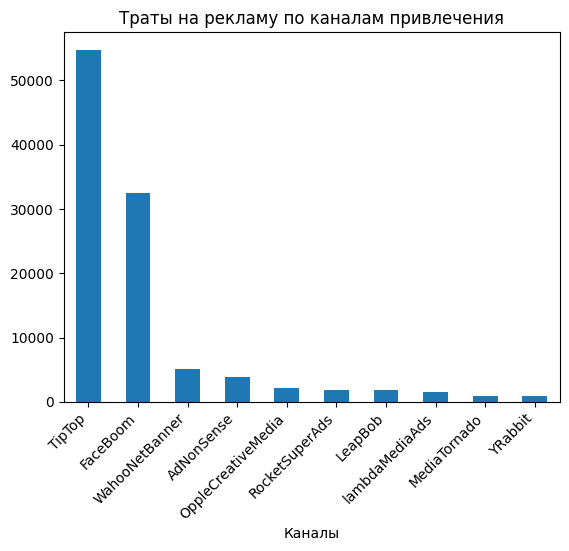

In [63]:
costs_channel['costs'].plot.bar()
plt.title('Траты на рекламу по каналам привлечения')
plt.xlabel('Каналы')
plt.xticks(rotation=45, ha='right');

#### Вывод

Более 82% трат приходится на 2 источника - TipTop (52%) и FaceBoom (31%). Остальные 18% расходов распределены между 8 источниками.\
Топ-5:
<pre>
TipTop               54751.30    51.90%
FaceBoom             32445.60    30.75%
WahooNetBanner       5151.00     4.88%
AdNonSense           3911.25     3.71%
OppleCreativeMedia   2151.25     2.04%
</pre>

### Визуализация расходов по источникам

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику

Добавим в таблицу с ценой на рекламу столбец с неделями и столбец с месяцами

In [64]:
costs['week'] = costs['dt'].dt.isocalendar().week

In [65]:
costs['month'] = costs['dt'].dt.month

In [66]:
costs.head()

dt   channel  costs  week  month
0 2019-05-01  FaceBoom  113.3    18      5
1 2019-05-02  FaceBoom   78.1    18      5
2 2019-05-03  FaceBoom   85.8    18      5
3 2019-05-04  FaceBoom  136.4    18      5
4 2019-05-05  FaceBoom  122.1    18      5

Составим сводную таблицу, где неделя - индексы, каналы - столбцы, значения - стоимость рекламы

In [67]:
costs_week = costs.pivot_table(values='costs', index='week', columns='channel', aggfunc='sum')

Визуализируем

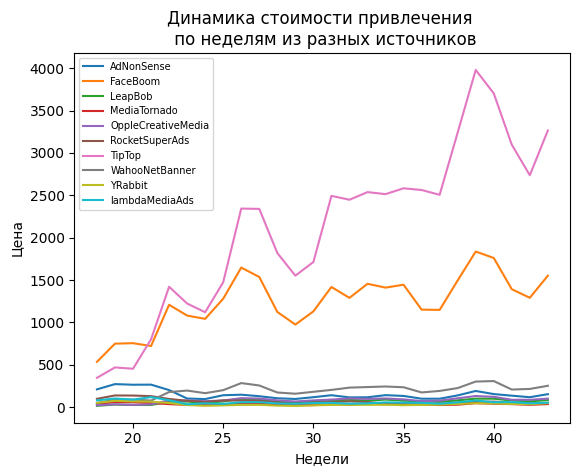

In [68]:
costs_week.plot.line()
plt.title('Динамика стоимости привлечения \n по неделям из разных источников')
plt.xlabel('Недели')
plt.ylabel('Цена')
plt.legend(fontsize=7);

Составим похожую сводную таблицу, но для месяцев

In [69]:
costs_month = costs.pivot_table(values='costs', index='month', columns='channel', aggfunc='sum')

Визуализируем

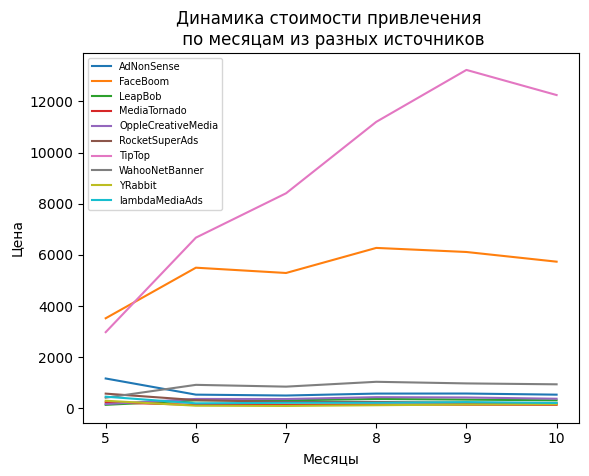

In [70]:
costs_month.plot.line()
plt.title('Динамика стоимости привлечения \n по месяцам из разных источников')
plt.xlabel('Месяцы')
plt.ylabel('Цена')
plt.legend(fontsize=7);

Рассмотрим соотношение трат на неделе 18, самой ранней неделе исследуемого периода

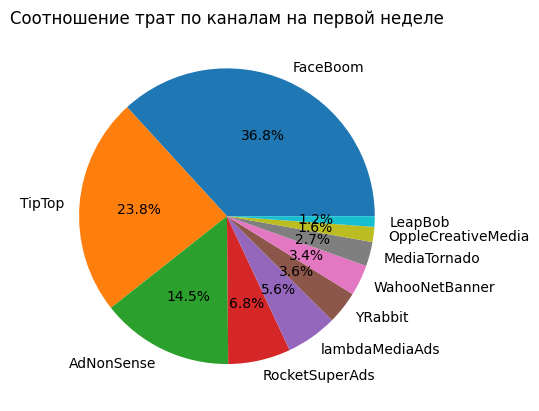

In [71]:
(
    costs[costs['week'] == 18]
    .groupby('channel')['costs']
    .sum()
    .sort_values(ascending=False)
    .plot
    .pie(autopct='%1.1f%%')
)
plt.title('Соотношение трат по каналам на первой неделе')
plt.ylabel('');

Рассмотрим соотношение трат на последней, 43 неделе

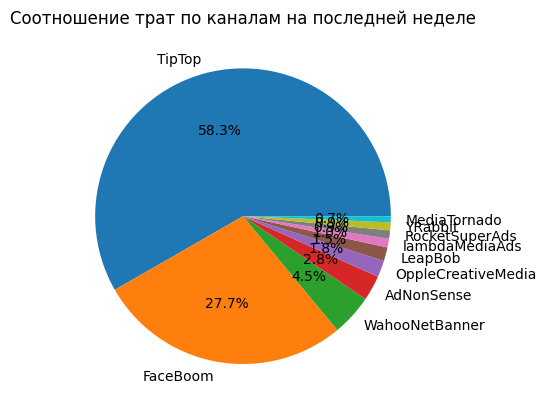

In [72]:
(
    costs[costs['week'] == 43]
    .groupby('channel')['costs']
    .sum()
    .sort_values(ascending=False)
    .plot
    .pie(autopct='%1.1f%%')
)
plt.title('Соотношение трат по каналам на последней неделе')
plt.ylabel('');

Сравним абсолютные траты на первой и последней неделе

In [73]:
costs_change = (
    costs_week
    .T[[18, 43]]
    .rename(columns={18: 'first_week', 
                     43: 'last_week'})
    .sort_values(by='last_week', ascending=False)
)
costs_change['growth_percent'] = costs_change['last_week'] / costs_change['first_week'] * 100 - 100
costs_change

week                first_week  last_week  growth_percent
channel                                                  
TipTop                  347.00    3265.50      841.066282
FaceBoom                535.70    1552.10      189.733060
WahooNetBanner           49.20     253.20      414.634146
AdNonSense              211.05     154.35      -26.865672
OppleCreativeMedia       24.00     101.50      322.916667
LeapBob                  16.80      84.42      402.500000
lambdaMediaAds           81.60      53.60      -34.313725
RocketSuperAds           99.45      50.70      -49.019608
YRabbit                  52.20      48.33       -7.413793
MediaTornado             38.64      37.44       -3.105590

#### Вывод

В начале исследуемого периода, на TipTop и FaceBoom уже тратилось больше, чем на остальные каналы привлечения (их суммарная доля расходов составляла более 60%), но к концу они выросли еще сильнее:

TipTop с 347 до 3266 (рост на 841%)\
FaceBoom с 536 до 1552 (на 190%)

Остальные каналы близко не подбираются к этим числам и на последней неделе затраты на них плавали от 37 до 253, их суммарная доля составляла всего 14%, на TipTop и FaceBoom приходилось 86% трат.

На половину каналов расходы увеличивались, на другую половину уменьшались, но в общей картине изменения заметны только для TipTop и FaceBoom

### CAC по источникам

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, используя профили пользователей

Составим сводную таблицу по каналам привлечения и посчитаем среднюю стоимость привлечения пользователя

In [74]:
acq_channel = (
    profiles[profiles['channel'] != 'organic']
    .groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
)
acq_channel

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172

Посчитаем среднюю стоимость привлечения среди каналов, исключая органических пользователей

In [75]:
profiles[profiles['channel'] != 'organic']['acquisition_cost'].mean()

1.1274813239427588

Визуализируем

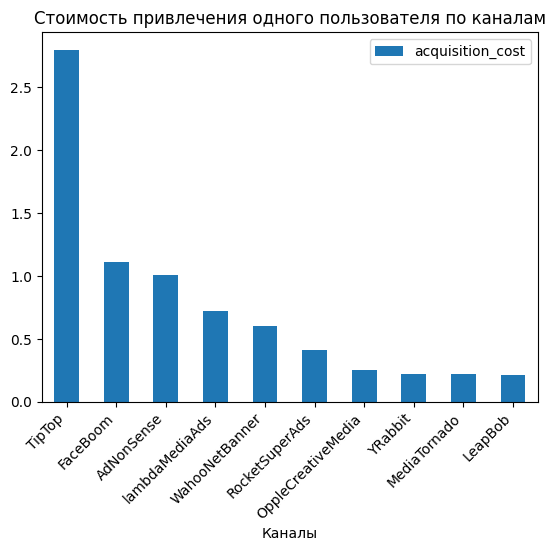

In [76]:
acq_channel.plot.bar()
plt.title('Стоимость привлечения одного пользователя по каналам')
plt.xlabel('Каналы')
plt.xticks(rotation=45, ha='right');

#### Вывод

TipTop оказался на первом месте не только по суммарным тратам на маркетинг, но и по средней цене привлечения одного пользователя - 2.8 против средней стоимости привлечения в 0.76 у всех каналов (исключая органику). И по стоимости он в 2.5 раза обгоняет идущий следом FaceBoom (1.11)

Наиболее дешевыми каналами привлечения оказались:

LeapBob 0.21\
MediaTornado 0.22\
YRabbit 0.22\
OppleCreativeMedia 0.25\
RocketSuperAds 0.41\
WahooNetBanner 0.60\
lambdaMediaAds 0.72

В этих источниках цена привлечения ниже средней.

Самый дешевый: LeapBob 0.21\
Самый дорогой: TipTop 2.8

### Вывод

Суммарные траты на рекламу составили **105 497**

Более 82% трат приходится на 2 источника - TipTop (52%) и FaceBoom (31%). Остальные 18% расходов распределены между 8 источниками.
Топ-5:
<pre>
TipTop               54751.30    51.90%
FaceBoom             32445.60    30.75%
WahooNetBanner       5151.00     4.88%
AdNonSense           3911.25     3.71%
OppleCreativeMedia   2151.25     2.04%
</pre>

В начале исследуемого периода, на TipTop и FaceBoom уже тратилось больше, чем на остальные каналы привлечения (их суммарная доля расходов составляла более 60%), но к концу они выросли еще сильнее:

TipTop с 347 до 3266 (рост на 841%)\
FaceBoom с 536 до 1552 (на 190%)

Остальные каналы близко не подбираются к этим числам и на последней неделе затраты на них плавали от 37 до 253, их суммарная доля составляла всего 14%, на TipTop и FaceBoom приходилось 86% трат.

На половину каналов расходы увеличивались, на другую половину уменьшались, но в общей картине изменения заметны только для TipTop и FaceBoom.

TipTop оказался на первом месте не только по суммарным тратам на маркетинг, но и по средней цене привлечения одного пользователя - 2.8 против средней стоимости привлечения в 0.76 у всех каналов (исключая органику). И по этому показателю он в 2.5 раза обгоняет идущий следом FaceBoom (1.11)

Наиболее дешевыми каналами привлечения оказались:

LeapBob 0.21\
MediaTornado 0.22\
YRabbit 0.22\
OppleCreativeMedia 0.25\
RocketSuperAds 0.41\
WahooNetBanner 0.60\
lambdaMediaAds 0.72

В этих источниках цена привлечения ниже средней.

**Самый дешевый пользователь: LeapBob 0.21\
Самый дорогой: TipTop 2.8**

## Окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определим самостоятельно.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишем вывод, опишем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Окупаемость рекламы. Графики LTV и ROI, графики динамики LTV, CAC и ROI

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

Таблица `profiles` содержит профили всех пользователей - и органических, и привлеченных за деньги. При рассчете окупаемости рекламы нам не понадобятся органические пользователи, так как на них не тратили рекламный бюджет.

Запишем платных пользователей в таблицу `paid_profiles`

In [77]:
paid_profiles = profiles[profiles['channel'] != 'organic']

In [78]:
paid_profiles.head()

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
3  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
7  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

          dt      month  payer  acquisition_cost  
0 2019-05-07 2019-05-01   True          1.088172  
1 2019-07-09 2019-07-01  False          1.107237  
3 2019-08-22 2019-08-01  False          0.988235  
4 2019-10-02 2019-10-01  False          0.230769  
7 2019-06-30 2019-06-01   True          1.008000

Для визуализации данных применим функцию `plot_ltv_roi()`, в которую передадим результат функции `get_ltv()`

Дата исследования 1 ноября 2019, её мы передадим `observation_date`\
Пользователи должны окупиться за 2 недели, поэтому передадим 14 дней `horizon_days`\
Таким образом, последней датой, в которую привлекли пользователей и они успели "прожить" 14 дней, будет 19 октября 2019

In [79]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Получим таблицы с данными по LTV и ROI

In [80]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(paid_profiles, orders, observation_date, horizon_days)

In [81]:
# средний LTV на 14-й день
ltv_grouped[13]

cohort
All users    0.90203
Name: 13.0, dtype: float64

In [82]:
# средний CAC
paid_profiles['acquisition_cost'].mean()

1.1274813239427588

In [83]:
paid_profiles.groupby('dt').agg({'acquisition_cost':'mean'})

acquisition_cost
dt                          
2019-05-01          0.781590
2019-05-02          0.714690
2019-05-03          0.760318
2019-05-04          0.737418
2019-05-05          0.730377
...                      ...
2019-10-23          1.195554
2019-10-24          1.231369
2019-10-25          1.259270
2019-10-26          1.350879
2019-10-27          1.334021

[180 rows x 1 columns]

In [84]:
# средний ROI на 14-й день
ltv_grouped[13] / paid_profiles['acquisition_cost'].mean()

cohort
All users    0.80004
Name: 13.0, dtype: float64

In [85]:
# средний ROI на 14-й день (2)
roi_grouped[13]

cohort
All users    0.806974
Name: 13.0, dtype: float64

In [86]:
# ROI 1 мая 2019
ltv_grouped[13] / paid_profiles[paid_profiles['dt'] == '2019-05-01']['acquisition_cost'].mean()

cohort
All users    1.154097
Name: 13.0, dtype: float64

In [87]:
# ROI 27 октября 2019
ltv_grouped[13] / paid_profiles[paid_profiles['dt'] == '2019-10-27']['acquisition_cost'].mean()

cohort
All users    0.676174
Name: 13.0, dtype: float64

Построим графики

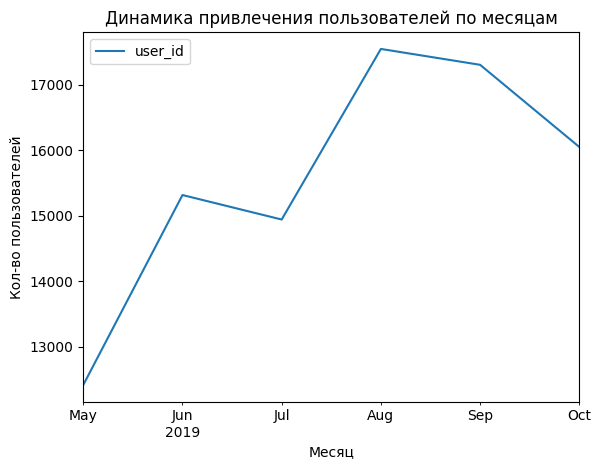

In [88]:
paid_profiles.groupby('month').agg({'user_id':'count'}).plot.line()
plt.title('Динамика привлечения пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во пользователей');

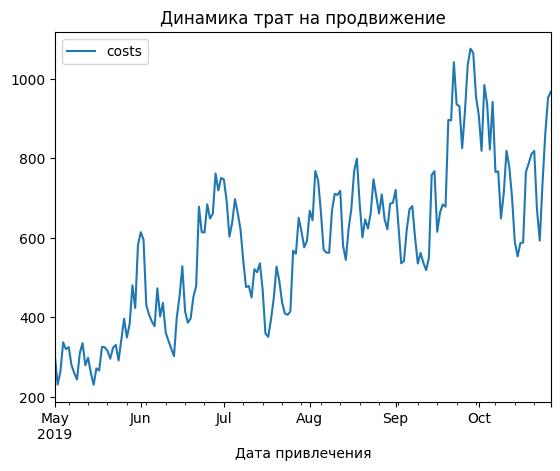

In [89]:
costs.groupby('dt').agg({'costs':'sum'}).plot.line()
plt.title('Динамика трат на продвижение')
plt.xlabel('Дата привлечения')
plt.ylabel('');

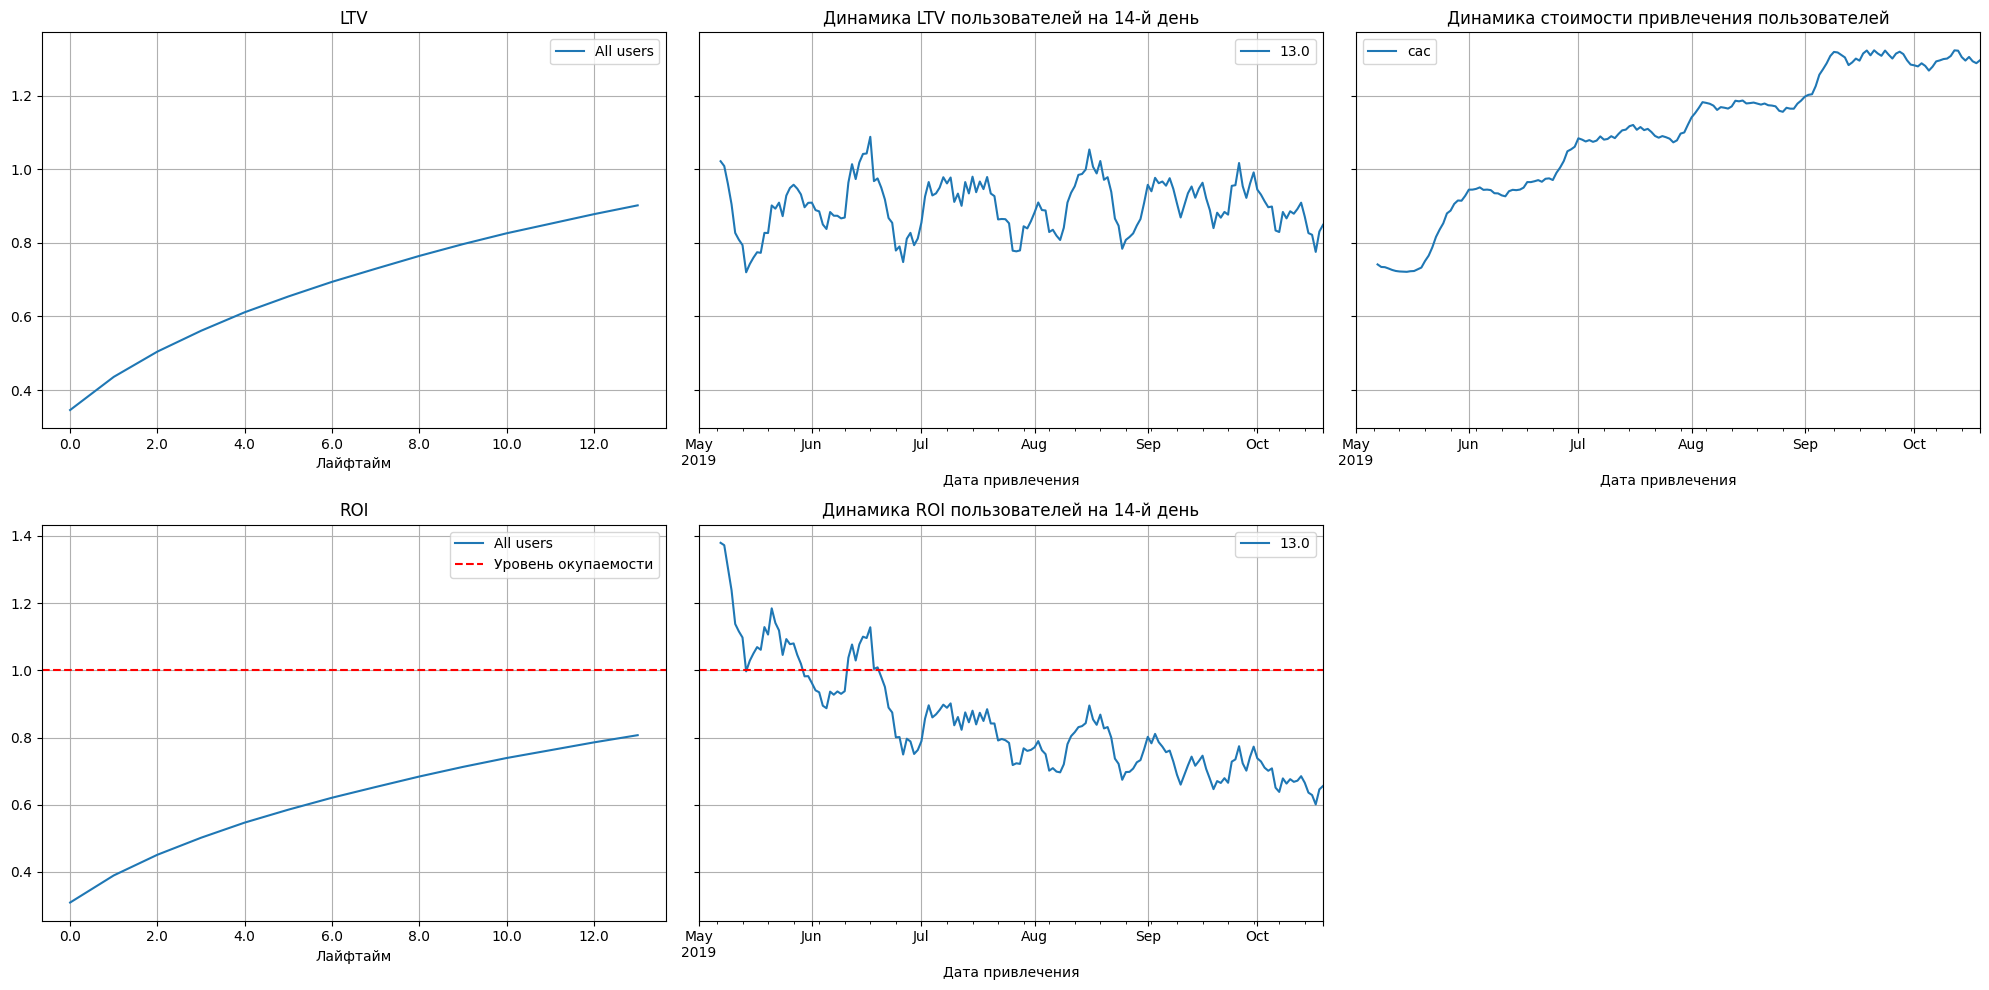

In [90]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Вывод

**Реклама не окупается**

ROI на 14-й день достигает 80% при средних LTV = 0.9 и CAC = 1.13.

**LTV**:\
LTV=0.9 в среднем\
В динамике LTV стабилен между 0.8 и 1 в течение всего периода

**CAC**:\
CAC = 1.13 в среднем

1 мая 2019:\
CAC=0.78

27 октября 2019:\
CAC=1.33

Стоимость привлечения пользователей стабильно росла весь период

**ROI**:\
ROI=80% в среднем

1 мая 2019:\
ROI = 115%

27 октября 2019:\
ROI = 67%

Затраты на рекламу окупаются только на 80%\
В динамике ROI стабильно снижался, примерно в конце мая опустился ниже уровня окупаемости, в первой половине июня поднялся выше, но во второй половине июня опять опустился ниже и больше не поднимался.

### Конверсия и удержание

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания

#### Конверсия

С помощью функции `get_conversion()` получим таблицы и передадим их функции `plot_conversion()` для визуализации конверсии

In [91]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(paid_profiles, orders, observation_date, horizon_days)

In [92]:
conversion_grouped

cohort_size       0.0       1.0       2.0       3.0     4.0  \
cohort                                                                   
All users        88644  0.058752  0.066321  0.069999  0.072571  0.0745   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.075775  0.076745  0.077591  0.078291  0.078945  0.079362   

               11.0      12.0      13.0  
cohort                                   
All users  0.079678  0.079904  0.080197

Визуализируем конверсию

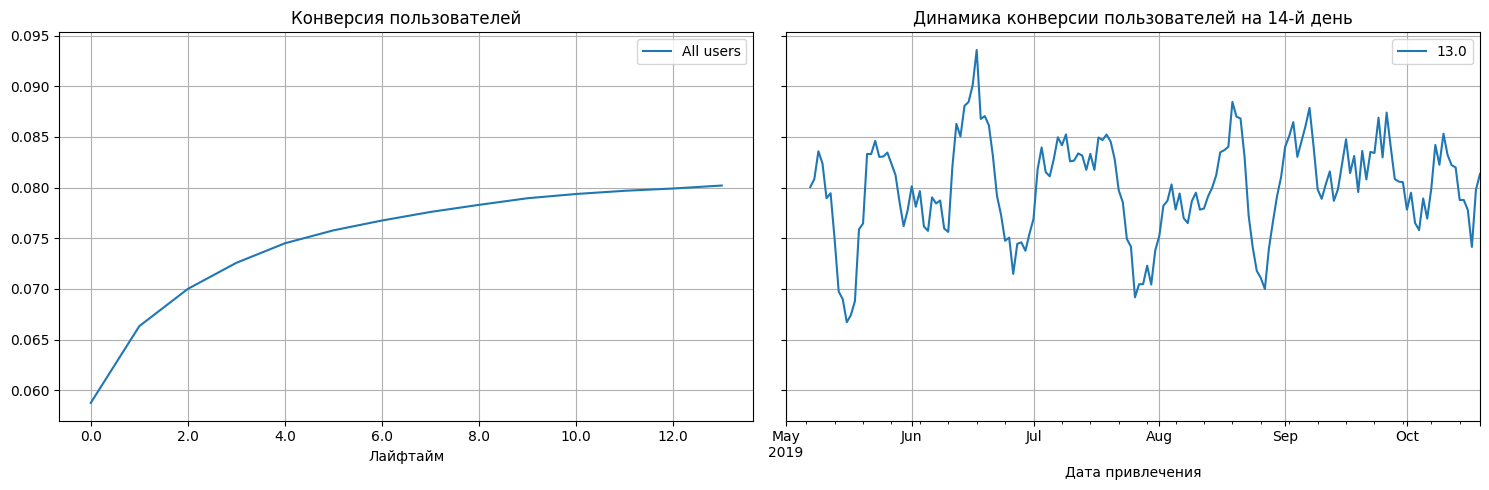

In [93]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Кривая конверсии плавная, достигает 8%. График динамики выглядит стабильно

#### Конверсия по устройствам

In [94]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(paid_profiles, orders, observation_date, horizon_days, dimensions=['device'])

In [95]:
conversion_grouped[13].sort_values(ascending=False)

device
Mac        0.087057
iPhone     0.084959
Android    0.079921
PC         0.065368
Name: 13.0, dtype: float64

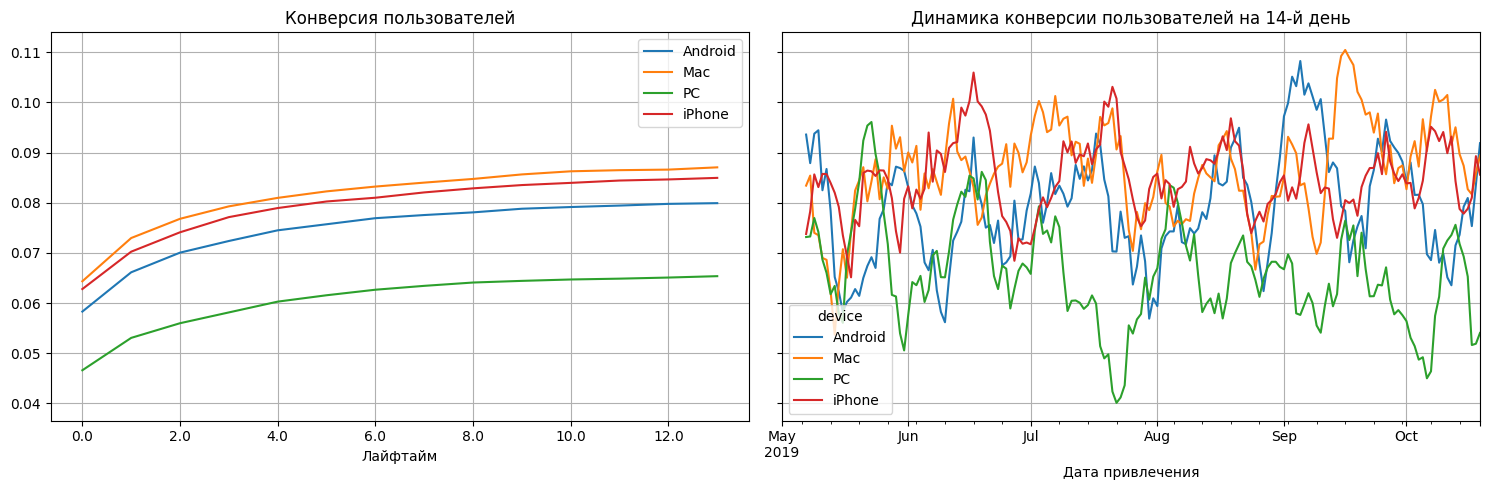

In [96]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Видно, что лучше всех конвертируется Mac (8.7%), не сильно отстает iPhone (8.5%) и Android (8%), а вот конверсия PC заметно ниже (6.5%).\
В динамике конверсия PC падала, конверсия остальных устройств немного выросла.

#### Конверсия по странам

In [97]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(paid_profiles, orders, observation_date, horizon_days, dimensions=['region'])

In [98]:
conversion_grouped[13].sort_values(ascending=False)

region
United States    0.096069
Germany          0.050498
UK               0.049165
France           0.048402
Name: 13.0, dtype: float64

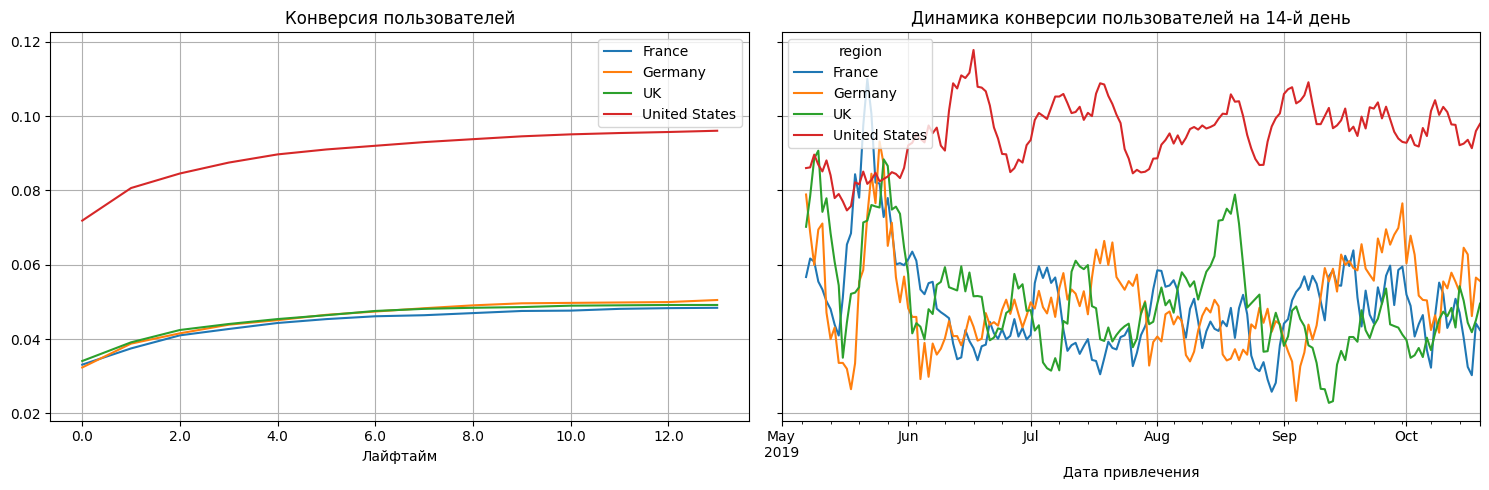

In [99]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия США (9.6%) заметно выше остальных стран, конверсия которых практически идентична (4.8-5%).\
На графике динамики видно, что конверсия США в целом стабильна, конверсия других стран в конце мая резко подскочила и упала, затем была скорее стабильна.

#### Конверсия по каналам

In [100]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(paid_profiles, orders, observation_date, horizon_days, dimensions=['channel'])

In [101]:
conversion_grouped[13].sort_values(ascending=False)

channel
FaceBoom              0.119373
AdNonSense            0.107509
lambdaMediaAds        0.103599
TipTop                0.093740
RocketSuperAds        0.073630
WahooNetBanner        0.052091
YRabbit               0.037055
MediaTornado          0.033357
LeapBob               0.029248
OppleCreativeMedia    0.026293
Name: 13.0, dtype: float64

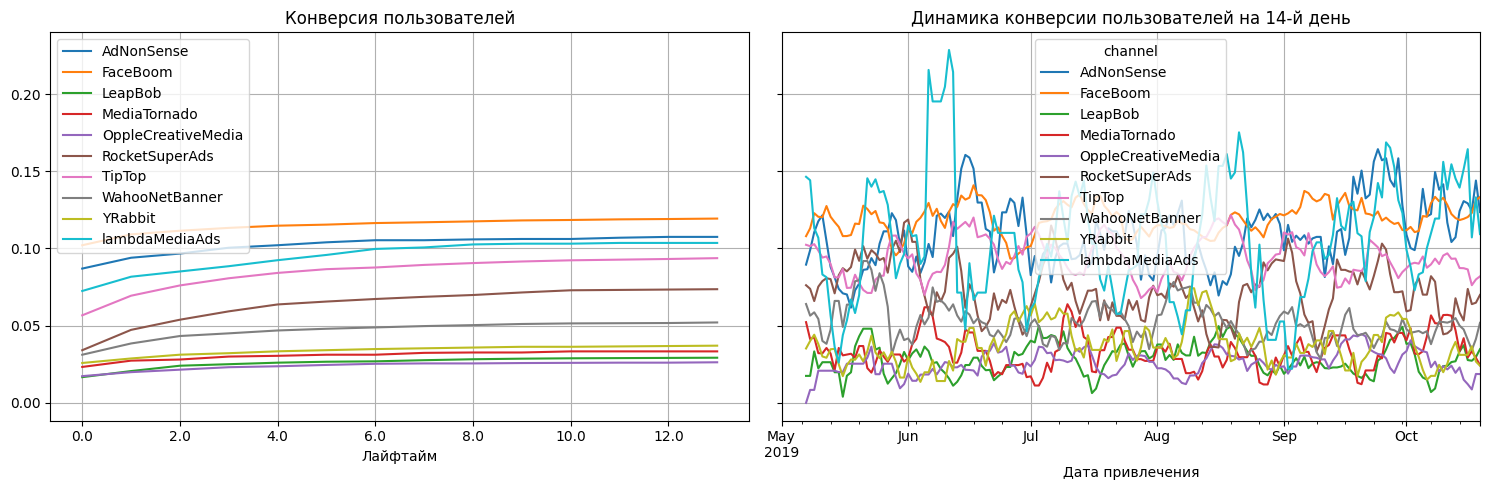

In [102]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у FaceBoom (11.9%), AdNonSense (10.7%), lambdaMediaAds (10.4%) и TipTop (9.4%).\
В динамике конверсия у всех каналов относительно стабильна, но lambdaMediaAds очень сильно скачет.

#### Удержание

С помощью функции `get_retention()` получим таблицы и передадим их функции `plot_retention()` для визуализации удержания

In [103]:
retention_raw, retention_grouped, retention_history = get_retention(paid_profiles, visits, observation_date, horizon_days)

In [104]:
retention_grouped

cohort_size    0         1         2         3         4         5  \
payer                                                                       
False        81334  1.0  0.176876  0.086594  0.051823  0.033504  0.024701   
True          7310  1.0  0.380985  0.293023  0.235568  0.210260  0.191245   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018651  0.014188  0.011729  0.009541  0.007488  0.006393  0.006012   
True   0.166758  0.156908  0.145144  0.136389  0.135021  0.121888  0.118741   

             13  
payer            
False  0.004709  
True   0.104925

Визуализируем удержание

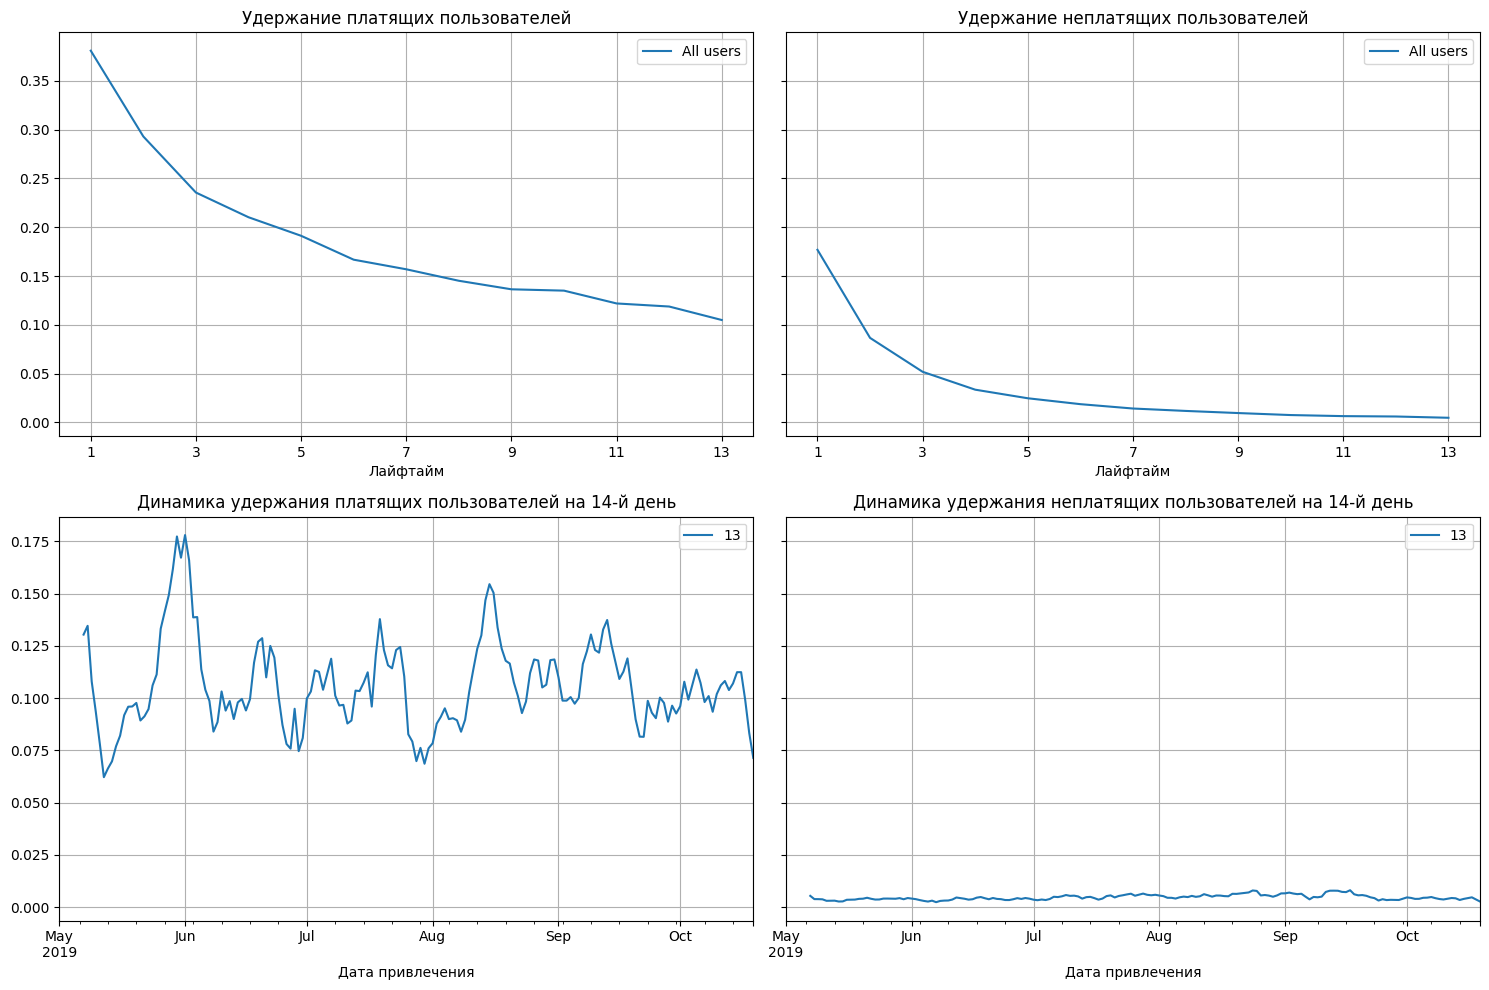

In [105]:
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей на 14-й день 10%, неплатящих около нуля.\
Динамика удержания платящих стабильна, неплатящих стабильно около нуля

#### Удержание по устройствам

In [106]:
retention_raw, retention_grouped, retention_history = get_retention(paid_profiles, visits, observation_date, horizon_days, dimensions=['device'])

In [107]:
retention_grouped[13].sort_values(ascending=False)

payer  device 
True   PC         0.124172
       Mac        0.110833
       Android    0.107375
       iPhone     0.091815
False  PC         0.005556
       Android    0.005056
       iPhone     0.004372
       Mac        0.004025
Name: 13, dtype: float64

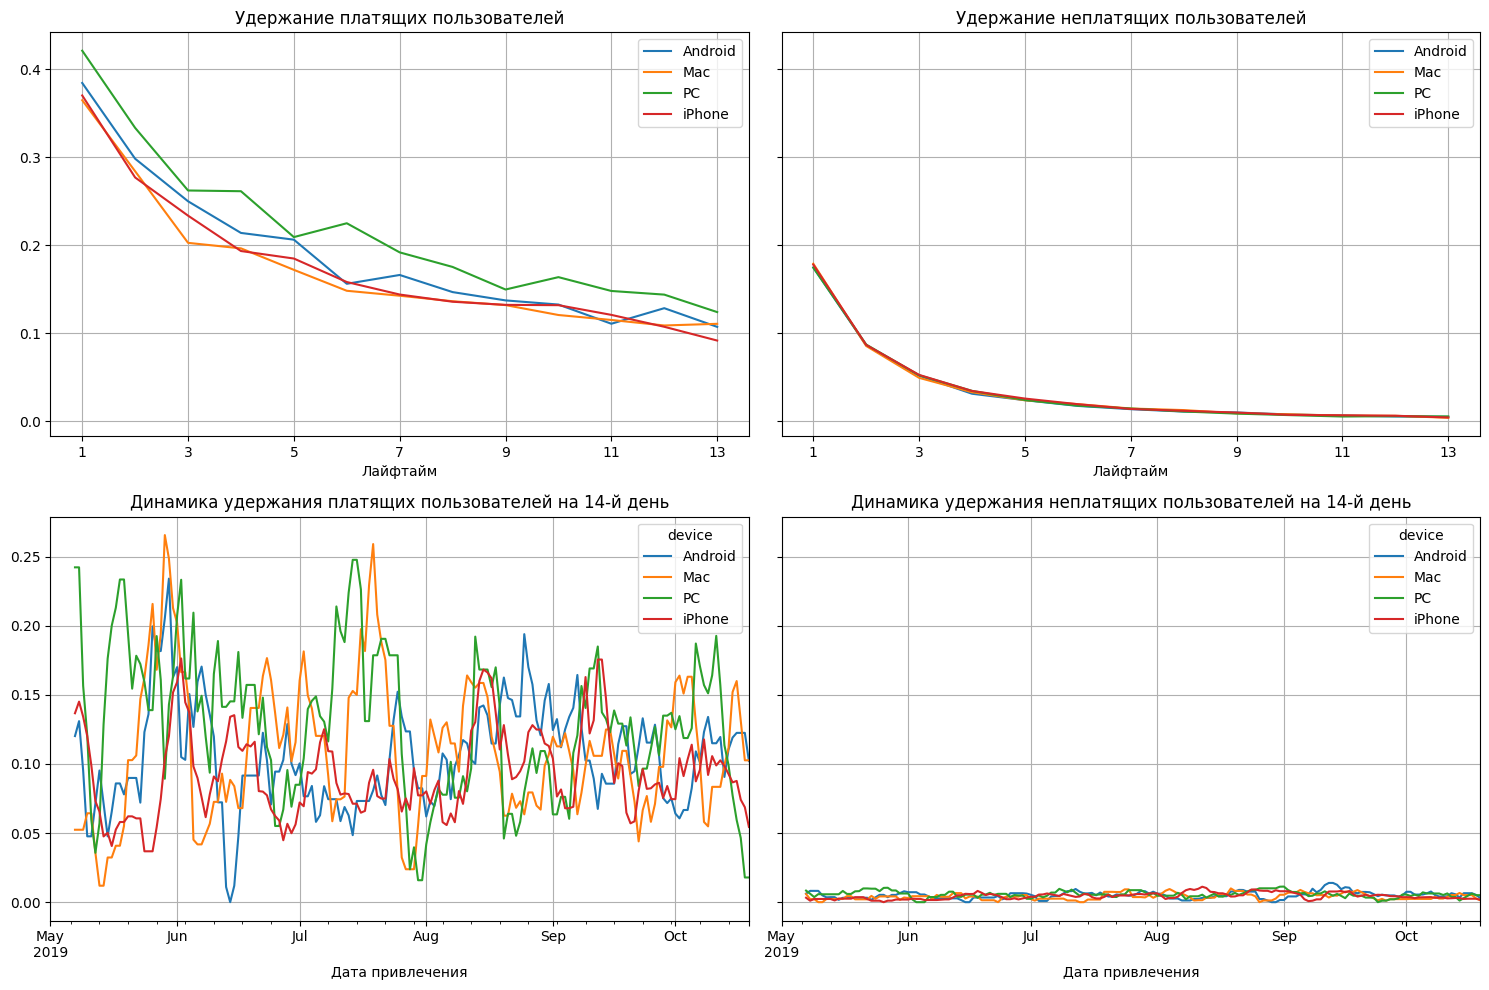

In [108]:
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей на 14-й день лучше у PC (12.4%), хуже у iPhone (9.1%). Кривые неплатящих практически не отличаются, значения на 14-й день - 0.4-0.5%.\
Динамика удержания платящих и неплатящих стабильна.

#### Удержание по странам

In [109]:
retention_raw, retention_grouped, retention_history = get_retention(paid_profiles, visits, observation_date, horizon_days, dimensions=['region'])

In [110]:
retention_grouped[13].sort_values(ascending=False)

payer  region       
True   UK               0.177903
       France           0.173996
       Germany          0.134904
       United States    0.089526
False  Germany          0.006540
       France           0.005504
       UK               0.004499
       United States    0.004301
Name: 13, dtype: float64

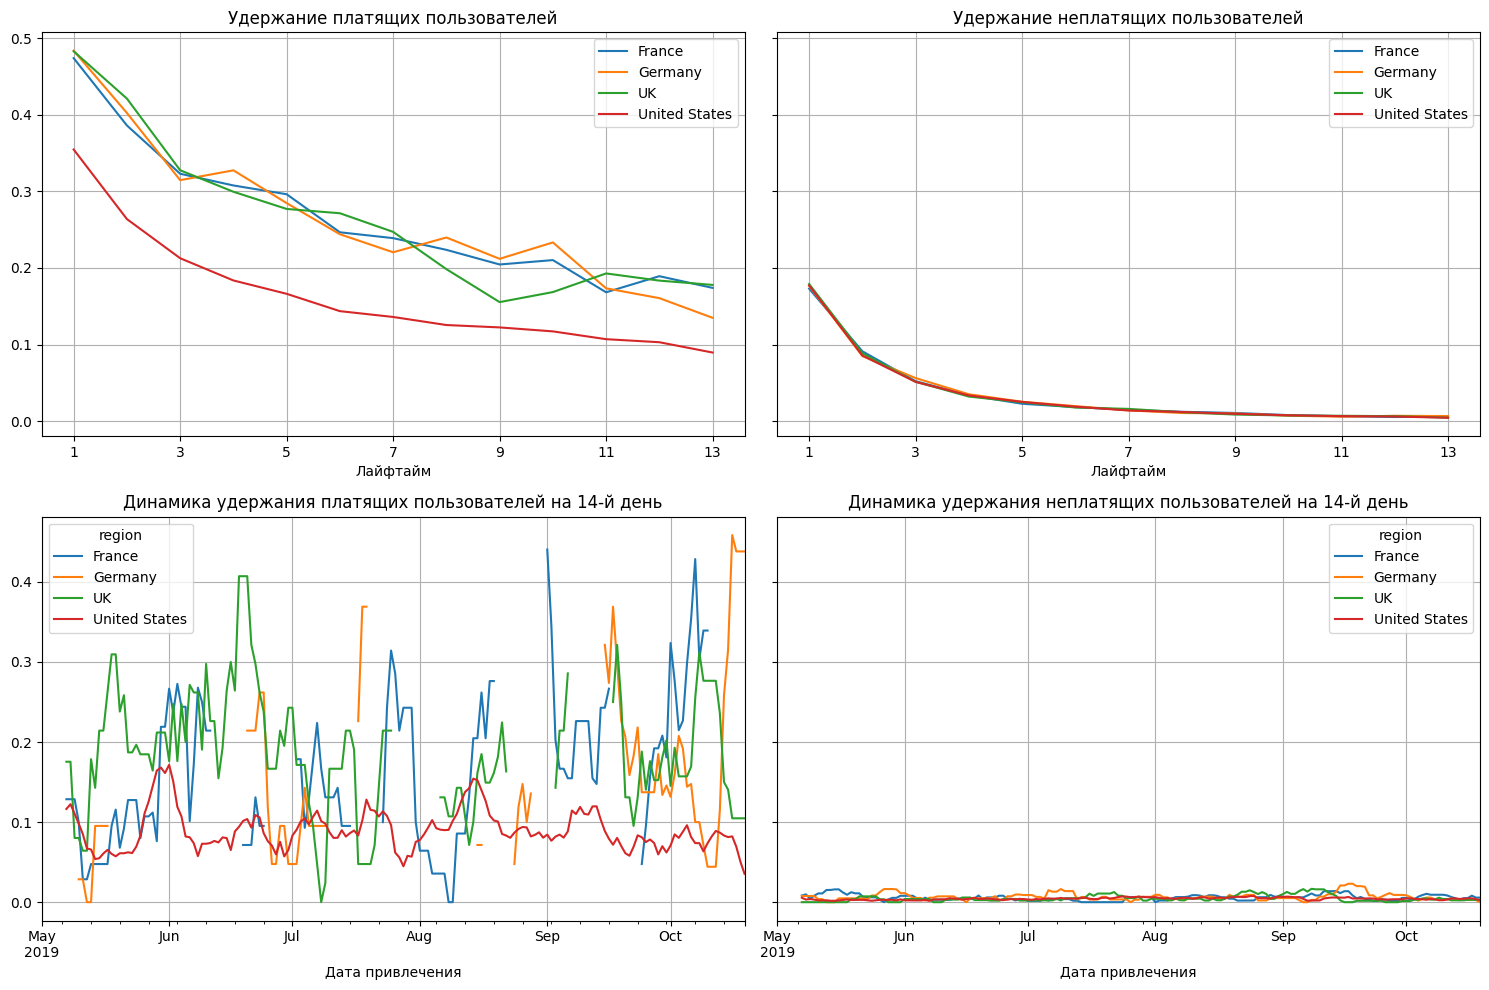

In [111]:
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей США (8.9%) ниже других стран, лучше всего у Великобритании (17.8%) и Франции (17.4%).\
Удержание убывает, но у некоторых стран в некоторые дни может ненамного вырасти.\
Удержание неплатящих во всех странах лежит в пределах 0.4-0.6%.\
График динамики выглядит странно - на всех линиях, кроме США, есть пропуски, линии обрываются и начинаются снова. Вероятно, это связано с тем, что в определенные временные отрезки было привлечено мало пользователей и поэтому нет данных об их удержании.\
Динамика удержания неплатящих стабильна для всех регионов около нуля.

#### Удержание по каналам

In [112]:
retention_raw, retention_grouped, retention_history = get_retention(paid_profiles, visits, observation_date, horizon_days, dimensions=['channel'])

In [113]:
retention_grouped[13].sort_values(ascending=False)

payer  channel           
True   WahooNetBanner        0.228972
       RocketSuperAds        0.220896
       OppleCreativeMedia    0.213636
       LeapBob               0.209877
       TipTop                0.206162
       lambdaMediaAds        0.190909
       MediaTornado          0.121622
       YRabbit               0.102564
       AdNonSense            0.026634
       FaceBoom              0.012493
False  AdNonSense            0.006689
       OppleCreativeMedia    0.005683
       lambdaMediaAds        0.005447
       WahooNetBanner        0.005357
       YRabbit               0.005068
       MediaTornado          0.004976
       LeapBob               0.004835
       FaceBoom              0.004342
       TipTop                0.004248
       RocketSuperAds        0.002809
Name: 13, dtype: float64

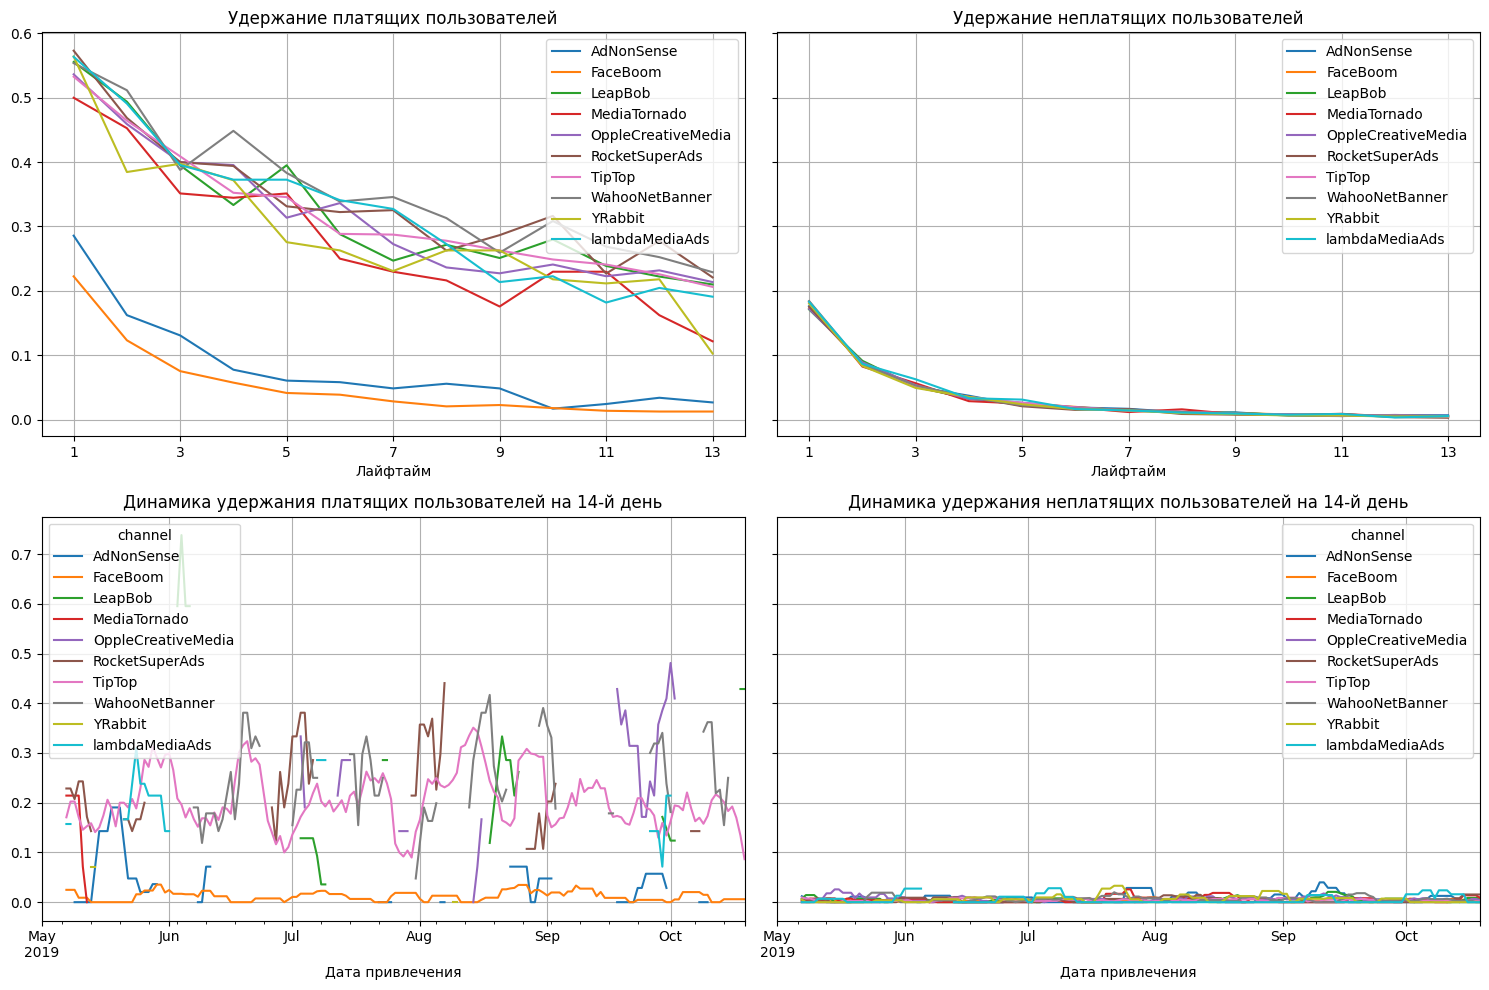

In [114]:
plot_retention(retention_grouped, retention_history, horizon_days)

Кривые удержания платящих пользователей AdNonSense и FaceBoom располагаются значительно ниже остальных источников - их удержание на 14-й день составляет всего 1-2% против 10-22% у остальных.\
Кривые удержания неплатящих сливаются в одну и располагаются около 0%.\
Динамика удержания платящих пользователей четко видна только для FaceBoom и TipTop, так как это наиболее многочисленные каналы привлечения, оба канала стабильны, на линиях остальных каналов видны разрывы из-за недостатка данных.\
Динамика удержания неплатящих стабильная около нуля.

#### Вывод

**Конверсия**

В целом, конверсия на 14-й день 8%, в динамике стабильная.

По устройствам, конверсия лучше у Mac (8.7%), а хуже у PC (6.5%).\
В динамике PC немного падал, а остальные устройства немного выросли.

По странам, конверсия США (9.6%) намного лучше конверсии других стран (4.8-5%).\
В динамике США немного подрос, а остальные страны подскочили в конце мая-начале июня и затем упали.

По каналам, самая высокая конверсия у FaceBoom (11.9%), самая низкая у OppleCreativeMedia (2.6%)\
В динамике конверсия у всех каналов относительно стабильна.

**Удержание**

В целом, удержание платящих пользователей на 14-й день 10%, неплатящих около нуля.\
Динамика удержания платящих стабильна, неплатящих стабильно около нуля.

По устройствам, удержание платящих пользователей лучше у PC (12.4%), хуже у iPhone (9.1%). Кривые неплатящих практически не отличаются, около 0%.\
Динамика удержания платящих и неплатящих стабильна.

По странам, удержание платящих пользователей США (8.9%) ниже других стран, лучше всего у Великобритании (17.8%).\
Удержание неплатящих во всех странах около 0%.\
График динамики выглядит странно - на всех линиях, кроме США, есть пропуски, линии обрываются и начинаются снова. Вероятно, это связано с тем, что в определенные временные отрезки было привлечено мало пользователей и поэтому нет данных об их удержании.\
Динамика удержания неплатящих стабильна для всех регионов около нуля.

По каналам, удержание платящих пользователей хуже у AdNonSense (2.6%) и FaceBoom (1.2%) и значительно отличается от остальных каналов. Лучше всего у WahooNetBanner (22.9%).\
Кривые удержания неплатящих сливаются в одну и располагаются около 0%.\
Динамика удержания платящих пользователей четко видна только для FaceBoom и TipTop, так как это наиболее многочисленные каналы привлечения, оба канала стабильны, на линиях остальных каналов видны разрывы из-за недостатка данных.\
Динамика удержания неплатящих стабильная около нуля.

### Окупаемость по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

Для начала снова вызовем функцию `get_ltv()`, но в этот раз передадим параметру `dimensions` аргумент `['device']`

In [115]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(paid_profiles, orders, observation_date, horizon_days, dimensions=['device'])

In [116]:
# ltv на 14-й день
ltv_grouped[13].sort_values(ascending=False)

device
Mac        0.930541
iPhone     0.916983
Android    0.912098
PC         0.836167
Name: 13.0, dtype: float64

In [117]:
# cac на последний день
roi_history.reset_index()[roi_history.reset_index()['dt'] == '2019-10-19'][['device', 'cac']].sort_values(by='cac', ascending=False)

device       cac
343      Mac  1.588738
687   iPhone  1.523096
171  Android  1.247789
515       PC  0.891689

In [118]:
# roi на 14-й день
roi_grouped[13].sort_values(ascending=False)

device
PC         1.054801
Android    0.894425
Mac        0.729139
iPhone     0.718064
Name: 13.0, dtype: float64

Теперь можно передавать функции для визуализации `plot_ltv_roi()` получившиеся датафреймы

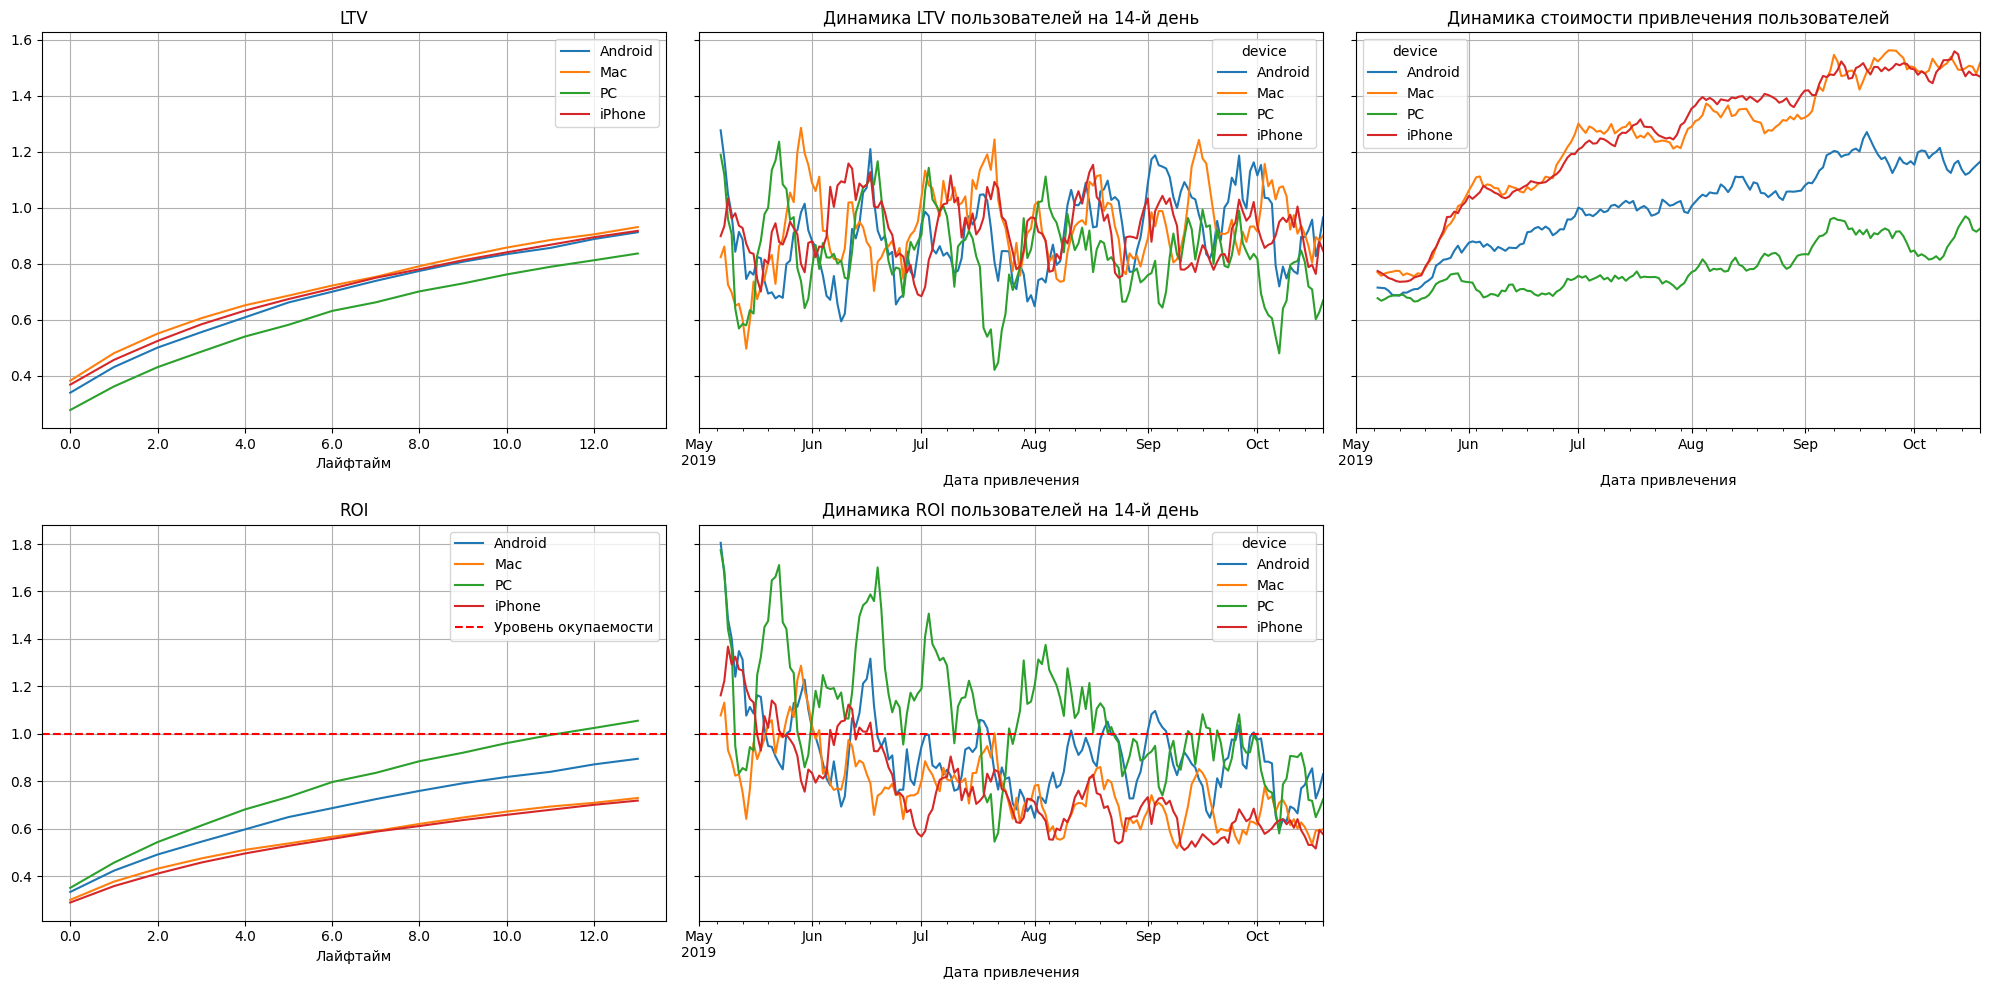

In [119]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Вывод

Всего устройств 4: Mac, iPhone, PC, Android

**LTV**\
Кривые LTV Mac, Android и iPhone практически не отличимы друг от друга, на 14-й день их LTV составляет 0.91-0.93, чуть ниже идет PC 0.83.

**CAC**\
Mac CAC=1.59\
iPhone CAC=1.52\
Android CAC=1.25\
PC CAC=0.89

Динамика CAC показывает рост стоимости привлечения для всех устройств, но для PC и Android стоимость выросла меньше, чем для iPhone и Mac.

**ROI**\
Средний ROI только PC преодолевает уровень окупаемости. Привлечение остальных пользователей не окупается.\
В динамике ROI в течение всего исследуемого периода постепенно падал для всех устройств. Выделяется PC с более выраженными колебаниями. На начало периода все устройства окупались, на конец периода все устройства перестали окупаться.

### Окупаемость по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

Вызовем функцию `get_ltv()` и передадим параметру `dimensions` аргумент `['region']`

In [120]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(paid_profiles, orders, observation_date, horizon_days, dimensions=['region'])

In [121]:
# ltv на 14-й день
ltv_grouped[13].sort_values(ascending=False)

region
United States    1.001316
UK               0.743481
Germany          0.713019
France           0.670278
Name: 13.0, dtype: float64

In [122]:
# cac на последний день
roi_history.reset_index()[roi_history.reset_index()['dt'] == '2019-10-19'][['region', 'cac']].sort_values(by='cac' ,ascending=False)

region       cac
687  United States  1.783725
343        Germany  0.465636
515             UK  0.426221
171         France  0.365113

In [123]:
# roi на 14-й день
roi_grouped[13].sort_values(ascending=False)

region
UK               1.634306
Germany          1.533709
France           1.457644
United States    0.687776
Name: 13.0, dtype: float64

Визуализируем

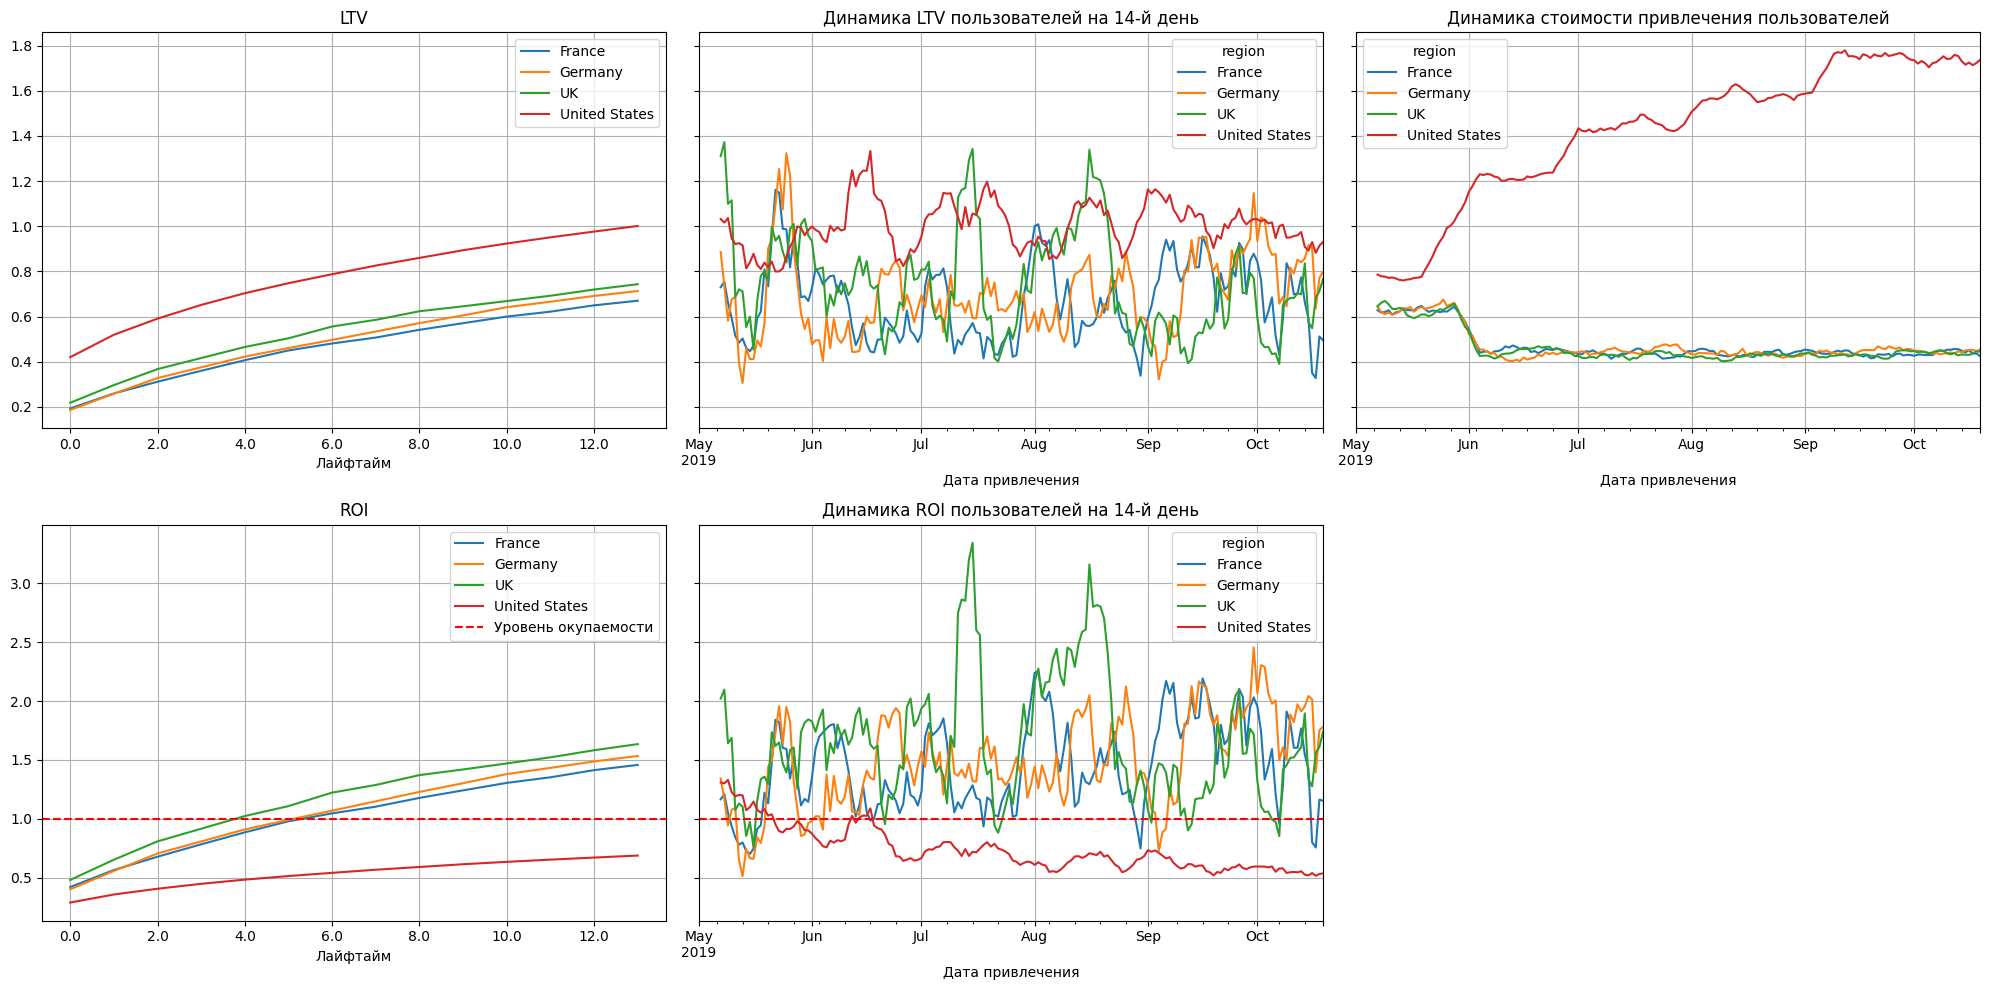

In [124]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Вывод

**Реклама окупается во всех странах кроме США**

Всего стран 4: France, Germany, UK, United States

**LTV**\
По кривым LTV видно, что пользователи из США с первого же дня приносят больше денег, чем пользователи из других стран. Германия и Великобритания и Франция идут почти вровень.\
В динамике LTV стабилен.

**CAC**\
В начале стоимость привлечения пользователей у США была 0.8, а у остальных стран 0.6, но в конце мая-начале июня CAC всех стран упал до 0.4 и был стабильным на протяжении всего периода, а CAC США резко вырос и продолжал рост, дойдя до значения 1.7.

**ROI**\
ROI Франции (146%), Германии (153%) и Великобритании (163%) пересекает уровень окупаемости уже на 5-6 день, в то время как ROI США (69%) не достигает уровня окупаемости в течение всех 14 дней.\
На графике динамики ROI видно, что до июня 2019 привлечение пользователей из США тоже окупалось, но ROI постепенно снижается в течение всего периода. Динамика ROI остальных стран относительно стабильна.

### Окупаемость по каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

Вызовем функцию `get_ltv()` и передадим параметру `dimensions` аргумент `['channel']`

In [125]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(paid_profiles, orders, observation_date, horizon_days, dimensions=['channel'])

In [126]:
# ltv на 14-й день
ltv_grouped[13].sort_values(ascending=False)

channel
lambdaMediaAds        1.766250
TipTop                1.487908
RocketSuperAds        0.933801
WahooNetBanner        0.918615
AdNonSense            0.838006
FaceBoom              0.821469
YRabbit               0.559668
MediaTornado          0.533684
LeapBob               0.473004
OppleCreativeMedia    0.409118
Name: 13.0, dtype: float64

In [127]:
# cac на последний день
roi_history.reset_index()[roi_history.reset_index()['dt'] == '2019-10-19'][['channel', 'cac']].sort_values(by='cac', ascending=False)

channel       cac
1203              TipTop  3.606870
343             FaceBoom  1.111282
171           AdNonSense  1.050000
1719      lambdaMediaAds  0.800000
1375      WahooNetBanner  0.600000
1031      RocketSuperAds  0.312500
859   OppleCreativeMedia  0.258197
1547             YRabbit  0.226800
515              LeapBob  0.206250
687         MediaTornado  0.176842

In [128]:
# roi на 14-й день
roi_grouped[13].sort_values(ascending=False)

channel
YRabbit               2.578086
MediaTornado          2.436519
lambdaMediaAds        2.428712
LeapBob               2.252399
RocketSuperAds        2.237019
OppleCreativeMedia    1.637075
WahooNetBanner        1.526304
AdNonSense            0.831337
FaceBoom              0.737790
TipTop                0.539532
Name: 13.0, dtype: float64

Визуализируем

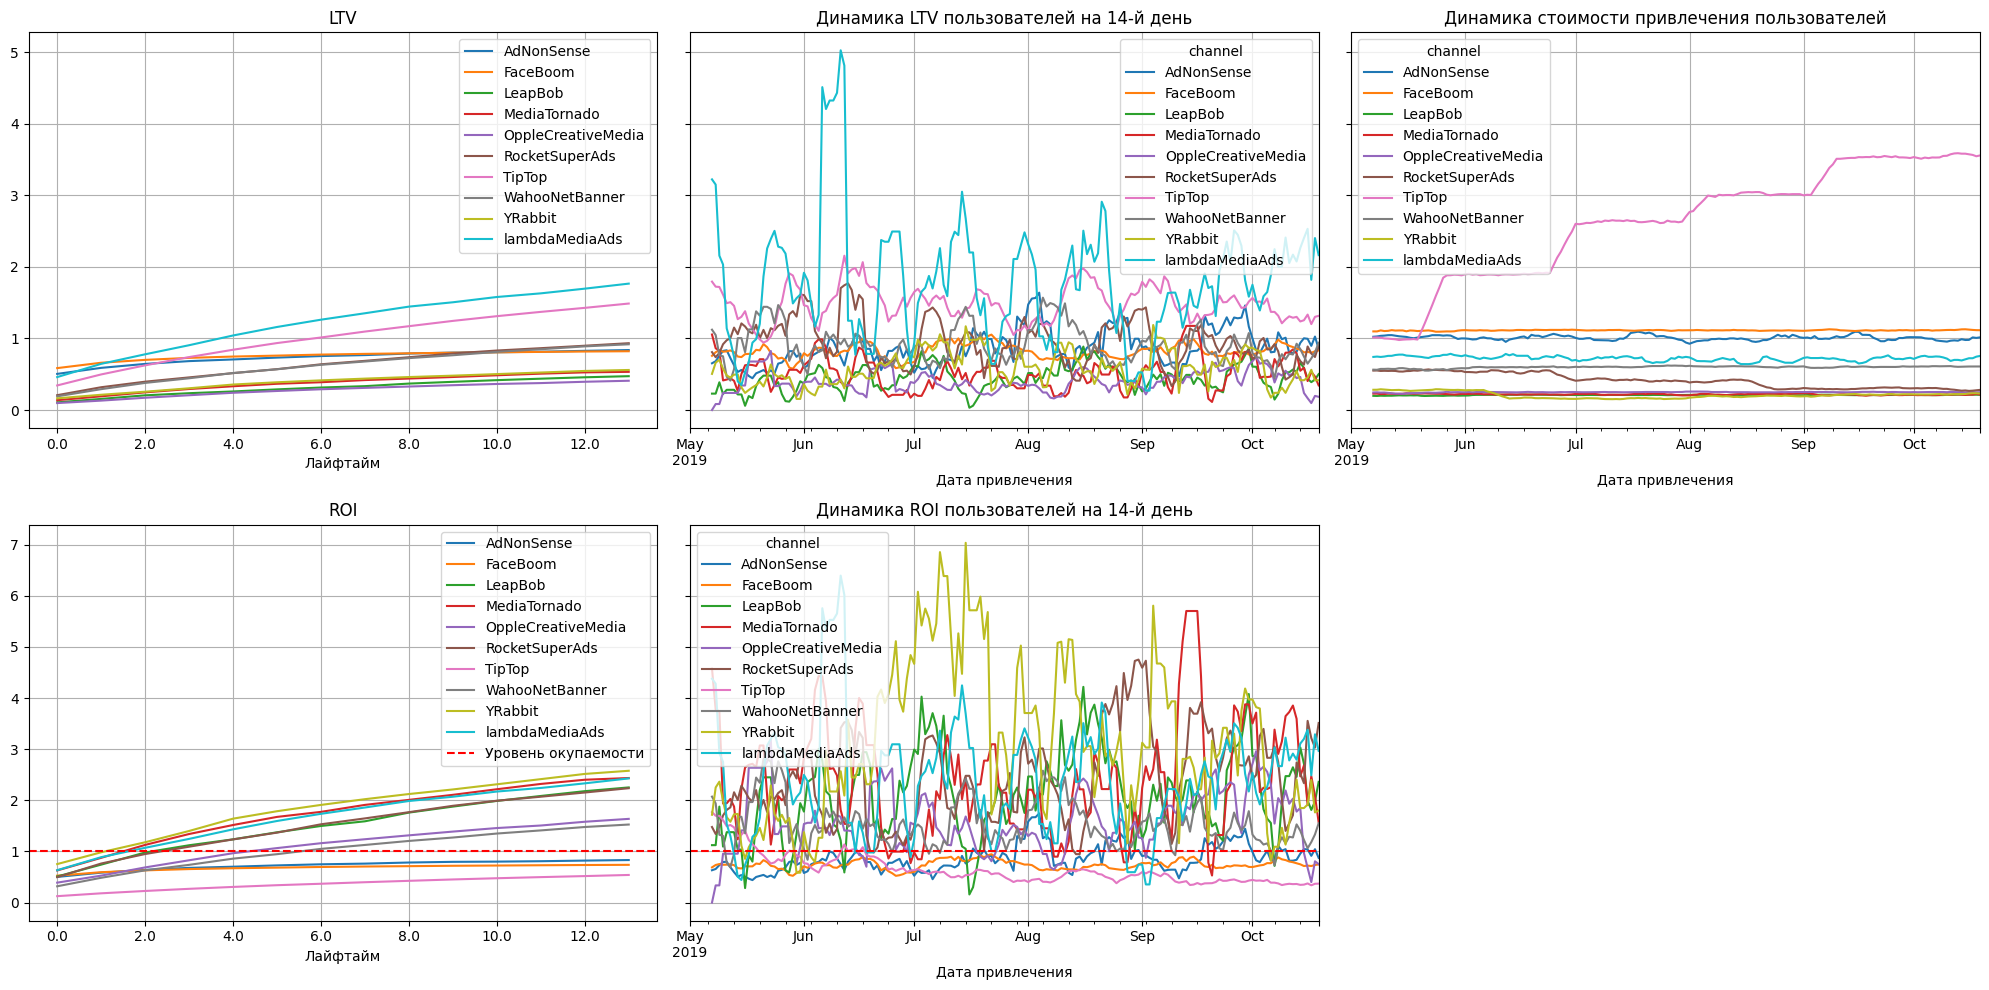

In [129]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Вывод

**Реклама окупается везде, кроме AdNonSense, FaceBoom и TipTop**

**LTV**\
Среди всех источников привлечения выделяются lambdaMediaAds (LTV=1.77) и TipTop (LTV=1.49). LTV остальных источников на 14-й день лежит в пределах 0.40-0.93.\
На графике динамики выделяется lambdaMediaAds - самый высокий показатель как в начале периода, так и в конце, но в то же время его LTV очень сильно скачет, может подняться до 5 и опуститься до 0.5.

**CAC**\
Динамика CAC у всех источников стабильная и не меняется, кроме TipTop - со значения 1 CAC постепенно с периодичностью примерно в 1 месяц рос и достиг 3.6 в конце. CAC остальных источников лежит в пределах 0.18-1.11.

**ROI**\
Все источники окупаются, кроме AdNonSense (ROI=83%), FaceBoom (ROI=74%) и TipTop (ROI=54%).\
Лучше всего окупаются YRabbit (2.58), MediaTornado (2.44), lambdaMediaAds (2.43), LeapBob (2.25), RocketSuperAds (2.24)\
В динамике ROI видно, что AdNonSense и FaceBoom были стабильно убыточны, а TipTop в начале окупался, но после середины мая ушел ниже уровня окупаемости и продолжал падать.

### Вывод

Ответьте на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Окупается ли реклама, направленная на привлечение пользователей в целом?**

В целом, реклама не окупается, ROI составляет 80% при ожидании окупаемости пользователя в течение 2 недель после привлечения

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

*Неокупающиеся устройства*:\
Android (ROI=89%)\
Mac (ROI=73%)\
iPhone (ROI=72%)

*Неокупающиеся страны*:\
США (ROI=69%)

*Неокупающиеся каналы*:\
AdNonSense (ROI=83%)\
FaceBoom (ROI=74%)\
TipTop (ROI=54%)

*Низкая конверсия*:\
PC (6.5%)\
Германия (5%)\
Великобритания (4.9%)\
Франция (4.8%)\
YRabbit (3.7%)\
MediaTornado (3.3%)\
LeapBob (2.9%)\
OppleCreativeMedia (2.6%)

*Низкое удержание*:\
США (8.9%)\
AdNonSense (2.7%)\
FaceBoom (1.2%)

**Чем могут быть вызваны проблемы окупаемости?**

**США**

66.7% всех пользователей (лучший)\
6.9% платящих пользователей (лучший)\
9.6% конверсия (лучший)\
8.9% удержание (худший)\
1 LTV (лучший, стабильный)\
1.7 CAC (худший, увеличивается)\
69% ROI (худший, уменьшается)

Из-за резкого увеличения CAC, но стабильного LTV, ROI опустился ниже уровня окупаемости и продолжает падать.\
Также, США показывает худший среди остальных стран уровень удержания - то есть, пользователей дорого привлекать, но потом они не возвращаются.

**Устройства**

На 27 октября 2019 ни одно устройство не окупалось, падение ROI скорее всего связано с ростом CAC, которое выросло из-за подавляющего количества пользователей из США, которые не окупаются.

**Каналы**

AdNonSense:
* 0.84 LTV (топ-5)
* 1 CAC (топ-3)
* 83% ROI (топ-8)
* Стабильно не окупался
* 2.6% всех пользователей (топ-10)
* 11.3% платящих пользователей (топ-2)
* 3.7% трат на рекламу, траты стабильны (топ-4)
* 10.7% конверсия (топ-2)
* 2.6 удержания (топ-9)

У AdNonSense низкое удержание, высокий CAC и относительно высокие траты на рекламу, что в сумме может давать низкую окупаемость.

FaceBoom:
* 0.82 LTV (топ-6)
* 1.1 CAC (топ-2)
* 74% ROI (топ-9)
* Стабильно не окупался
* 19.4% всех пользователей (топ-2)
* 12.2% платящих пользователей (топ-1)
* 31% трат на рекламу, траты увеличились (топ-2)
* 12% конверсия (топ-1)
* 1.2% удержания (топ-10)

У FaceBoom самый низкий уровень удержания, один из самых высоких CAC, а также большие и постоянно увеличивающиеся траты на рекламу, что может приводить к неокупаемости.

TipTop:
* 1.48 LTV (топ-2)
* 2.8 CAC (топ-1)
* 54% ROI (топ-10)
* Перестал окупаться в середине мая и продолжил падение
* 13% всех пользователей (топ-3)
* 9.6% платящих пользователей (топ-4)
* 52% трат на рекламу, траты увеличились (топ-1)
* 9.4% конверсия (топ-4)
* 20.6% удержание (топ-5)

У TipTop самый высокий CAC и самые большие и растущие траты на рекламу, вероятно, это и послужило причиной неокупаемости.

**Рекомендации**

Возможно, стоит присмотреться к привлечению пользователей пользователей других устройств, стран и каналов, которые будут перформить отнюдь не хуже.

*Окупающиеся устройства*:\
PC (ROI=105%)

*Окупающиеся страны*:\
UK (ROI=163%)\
Germany (ROI=153%)\
France (ROI=146%)

*Окупающиеся каналы*:\
YRabbit (ROI=258%)\
MediaTornado (ROI=244%)\
lambdaMediaAds (ROI=243%)\
LeapBob (ROI=225%)\
RocketSuperAds (ROI=224%)\
OppleCreativeMedia (ROI=164%)\
WahooNetBanner (ROI=153%)

Из стран, лучше обратить внимание на Великобританию и Францию, так как у них почти в 2 раза лучше удержание, чем у США. Также у Франции самый низкий CAC, а у Великобритании LTV выше других европейских стран.

Из каналов, хорошая конверсия и самый высокий LTV у lambdaMediaAds. Хорошее удержание у WahooNetBanner, RocketSuperAds, OppleCreativeMedia и LeapBob. Самый низкий CAC у YRabbit, LeapBob и MediaTornado.

Из устройств, у PC самый низкий CAC и лучшее удержание.

## Итоговый вывод

- Выделим причины неэффективности привлечения пользователей.
- Сформулируем рекомендации для отдела маркетинга.

### Вводные
**На входе мы получили 3 таблицы**:

`visits`
* данные о 309901 сессии, 6 параметров
* пропусков нет
* явных дубликатов нет
* типы данных соответствуют значениям
* названия столбцов нужно было привести к snake_case

`orders`
* данные о 40212 заказах, 3 параметра
* пропусков нет
* явных дубликатов нет
* типы данных соответствуют значениям
* названия столбцов нужно было привести к snake_case

`costs`
* данные о 1800 рекламных кампаниях, 3 параметра
* пропусков нет
* явных дубликатов нет
* типы данных соответствуют значениям
* названия столбцов нужно было привести к snake_case

В ходе предобработки потребовалось только привести названия столбцов к snake_case.

**Затем мы задали функции для расчета и визуализации метрик**

Функции для вычисления метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Исследовательский анализ данных
**В ходе исследовательского анализа данных мы изучили страны, устройства и каналы привлечения наших пользователей**

**Коротко**:
* 2/3 пользователей из США, они же наиболее платящие
* Более 1/3 устройств - iPhone
* Более 1/3 пользователей органические, но это лишь 13% от платящих
* 40% платящих пользователей пришли из FaceBoom

Мы составили профили пользователей и убедились, что минимальная и максимальная даты привлечения совпадают с указанными ранее:\
с 1 мая 2019 по 27 октября 2019.

Наши пользователи живут в США, Великобритании, Франции и Германии.
Разделение всех пользователей по странам:

США 66.7%\
Великобритания 11.7%\
Франция 11.6%\
Германия 10%

Доля платящих пользователей от числа пользователей из этой страны:

США 6.9%\
Германия 4.1%\
Великобритания 4%\
Франция 3.7%

**Самая многочисленная и самая платящая страна - США**

Они пользуются 4 видами устройств: iPhone, Android, Mac, PC.\
Разделение всех пользователей по устройствам:

iPhone 36%\
Android 23%\
PC 20%\
Mac 20%

Распределение среди платящих пользователей:

iPhone 38%\
Android 23%\
Mac 22%\
PC 17%

**Наиболее популярное устройство - iPhone**

Разделение всех пользователей по каналам привлечения (топ-5):

organic	38%\
FaceBoom 19%\
TipTop 13%\
OppleCreativeMedia 6%\
LeapBob 6%

Самые популярные рекламные источники привлечения платящих пользователей:

FaceBoom 40%\
TipTop 21%\
organic 13%\
WahooNetBanner 5%\
AdNonSense 5%

**Большинство платящих пользователей приходит с FaceBoom**

### Маркетинг

**Коротко**:
* Всего на рекламу потратили 105,497
* 82% трат это TipTop (52%) и FaceBoom (31%)
* Они же с самой высокой ценой привлечения
* В мае-июне резко выросли траты на эти два источника

Суммарные траты на рекламу составили 105,497

Более 82% трат приходится на 2 источника - TipTop (52%) и FaceBoom (31%). Остальные 18% расходов распределены между 8 источниками.
<pre>
TipTop               54751.30    51.90%
FaceBoom             32445.60    30.75%
WahooNetBanner       5151.00     4.88%
AdNonSense           3911.25     3.71%
OppleCreativeMedia   2151.25     2.04%
RocketSuperAds       1833.00     1.74%
LeapBob              1797.60     1.70%
lambdaMediaAds       1557.60     1.48%
MediaTornado         954.48      0.90%
YRabbit              944.22      0.90%
</pre>

В динамике, на половину каналов расходы увеличивались, на другую половину уменьшались, но в общей картине значительный рост заметен только для TipTop и FaceBoom - TipTop вырос с 347 до 3266, FaceBoom с 536 до 1552.

TipTop оказался на первом месте не только по суммарным тратам на маркетинг, но и по средней цене привлечения одного пользователя - 2.8 против средней стоимости привлечения в 0.76 у всех каналов (исключая органику). И по этому показателю он в 2.5 раза обгоняет идущий следом FaceBoom (1.11)

Наиболее дешевыми каналами привлечения оказались:

LeapBob 0.21\
MediaTornado 0.22\
YRabbit 0.22\
OppleCreativeMedia 0.25\
RocketSuperAds 0.41\
WahooNetBanner 0.60\
lambdaMediaAds 0.72

В этих источниках цена привлечения ниже средней.

**Самый дешевый пользователь: LeapBob 0.21\
Самый дорогой: TipTop 2.8**

### Окупаемость рекламы

**Коротко**:
* Реклама в целом не окупается, средний ROI=80%
* Конверсия увеличилась с 4.5% до 6%
* Удержание платящих 12.5%, неплатящих около 0%
* Реклама в среднем окупается только на PC, но на конец периода перестала
* Реклама окупается во всех странах, кроме США
* Реклама окупается везде, кроме AdNonSense, FaceBoom и TipTop
* В конце мая-начале июня начался резкий рост стоимости привлечения у США и TipTop, и поскольку большинство пользователей из США и большинство было привлечено из TipTop, то это негативно влияет на весь бизнес и тянет ROI вниз

**Окупается ли реклама, направленная на привлечение пользователей в целом?**

В целом, реклама не окупается, ROI составляет 80% при ожидании окупаемости пользователя в течение 2 недель после привлечения

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

*Неокупающиеся устройства*:\
Android (ROI=89%)\
Mac (ROI=73%)\
iPhone (ROI=72%)

*Неокупающиеся страны*:\
США (ROI=69%)

*Неокупающиеся каналы*:\
AdNonSense (ROI=83%)\
FaceBoom (ROI=74%)\
TipTop (ROI=54%)

*Низкая конверсия*:\
PC (6.5%)\
Германия (5%)\
Великобритания (4.9%)\
Франция (4.8%)\
YRabbit (3.7%)\
MediaTornado (3.3%)\
LeapBob (2.9%)\
OppleCreativeMedia (2.6%)

*Низкое удержание*:\
США (8.9%)\
AdNonSense (2.7%)\
FaceBoom (1.2%)

**Чем могут быть вызваны проблемы окупаемости?**

**США**

66.7% всех пользователей (лучший)\
6.9% платящих пользователей (лучший)\
9.6% конверсия (лучший)\
8.9% удержание (худший)\
1 LTV (лучший, стабильный)\
1.7 CAC (худший, увеличивается)\
69% ROI (худший, уменьшается)

Из-за резкого увеличения CAC, но стабильного LTV, ROI опустился ниже уровня окупаемости и продолжает падать.\
Также, США показывает худший среди остальных стран уровень удержания - то есть, пользователей дорого привлекать, но потом они не возвращаются.

**Устройства**

На 27 октября 2019 ни одно устройство не окупалось, падение ROI скорее всего связано с ростом CAC, которое выросло из-за подавляющего количества пользователей из США, которые не окупаются.

**Каналы**

AdNonSense:
* 0.84 LTV (топ-5)
* 1 CAC (топ-3)
* 83% ROI (топ-8)
* Стабильно не окупался
* 2.6% всех пользователей (топ-10)
* 11.3% платящих пользователей (топ-2)
* 3.7% трат на рекламу, траты стабильны (топ-4)
* 10.7% конверсия (топ-2)
* 2.6 удержания (топ-9)

У AdNonSense низкое удержание, высокий CAC и относительно высокие траты на рекламу, что в сумме может давать низкую окупаемость.

FaceBoom:
* 0.82 LTV (топ-6)
* 1.1 CAC (топ-2)
* 74% ROI (топ-9)
* Стабильно не окупался
* 19.4% всех пользователей (топ-2)
* 12.2% платящих пользователей (топ-1)
* 31% трат на рекламу, траты увеличились (топ-2)
* 12% конверсия (топ-1)
* 1.2% удержания (топ-10)

У FaceBoom самый низкий уровень удержания, один из самых высоких CAC, а также большие и постоянно увеличивающиеся траты на рекламу, что может приводить к неокупаемости.

TipTop:
* 1.48 LTV (топ-2)
* 2.8 CAC (топ-1)
* 54% ROI (топ-10)
* Перестал окупаться в середине мая и продолжил падение
* 13% всех пользователей (топ-3)
* 9.6% платящих пользователей (топ-4)
* 52% трат на рекламу, траты увеличились (топ-1)
* 9.4% конверсия (топ-4)
* 20.6% удержание (топ-5)

У TipTop самый высокий CAC и самые большие и растущие траты на рекламу, вероятно, это и послужило причиной неокупаемости.

**Рекомендации**

Возможно, стоит присмотреться к привлечению пользователей пользователей других устройств, стран и каналов, которые будут перформить отнюдь не хуже.

*Окупающиеся устройства*:\
PC (ROI=105%)

*Окупающиеся страны*:\
UK (ROI=163%)\
Germany (ROI=153%)\
France (ROI=146%)

*Окупающиеся каналы*:\
YRabbit (ROI=258%)\
MediaTornado (ROI=244%)\
lambdaMediaAds (ROI=243%)\
LeapBob (ROI=225%)\
RocketSuperAds (ROI=224%)\
OppleCreativeMedia (ROI=164%)\
WahooNetBanner (ROI=153%)

Из стран, лучше обратить внимание на Великобританию и Францию, так как у них почти в 2 раза лучше удержание, чем у США. Также у Франции самый низкий CAC, а у Великобритании LTV выше других европейских стран.

Из каналов, хорошая конверсия, неплохое удержание и самый высокий LTV у lambdaMediaAds. У WahooNetBanner 1 место, а у RocketSuperAds 2 место по удержанию, у обоих неплохая конверсия (6 и 5 места соответственно).

Из устройств, у PC самый низкий CAC и лучшее удержание.